# GUC NETW 1003 Kmeans Assginmnet 

## 1. Wirte K means function 

import required libraries 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

In [112]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial.distance import correlation
import random

Importing the Customer Data file

In [113]:
excel_file_path = r'C:\Users\khaled\Desktop\Education\GUC Documents\Semester 10\Machine Learning\Assignment 1\Customer data.csv'
df = pd.read_csv(excel_file_path) 
df = df.drop(df.columns[0], axis=1)

Customer_data =df.to_numpy()

In [114]:
df.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [116]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):

    num_rows = len(Data_points)
    num_Columns = len(Cluster_Centroids)
    Distance_Matrix = np.zeros((num_rows, num_Columns))
    
    for i in range(num_rows):
        for j in range(num_Columns): 
            if Distance_Type == "Ecluidian distance":
                ecluidian_distance = np.sqrt(np.sum((Data_points[i] - Cluster_Centroids[j])**2))
                Distance_Matrix[i, j] = ecluidian_distance 
            elif Distance_Type == "Pearson correlation distance":
                pearson_distance = 1 - correlation(Data_points[i], Cluster_Centroids[j])
                Distance_Matrix[i, j] = pearson_distance 


    return Distance_Matrix



> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [117]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type , Display_details ):

  # intializations 
  Final_Cluster_Distance = np.zeros((len(Data_points), 4)) 
  Cluster_Metric = np.zeros(Number_of_Clusters)
  Cluster_Centroids = np.zeros((Number_of_Clusters,Data_points.shape[1]))

  for i in range(Data_points.shape[1]):
    min_value = np.min(Data_points[:, i])
    max_value = np.max(Data_points[:, i])
    for j in range(Number_of_Clusters):
      Cluster_Centroids[j, i] = np.random.uniform(min_value, max_value)

  j = 1
  sum_of_mean_distances_old = 0 

  # The Clustering Loop
   
  while(True):

    if j>1: 
      sum_of_mean_distances_old = sum_of_mean_distances_new

    
    Distance_Matrix = GUC_Distance( Cluster_Centroids, Data_points, Distance_Type )
    min_Cluster_index = np.argmin(Distance_Matrix, axis=1)
    min_distance_value = Distance_Matrix[np.arange(Distance_Matrix.shape[0]), min_Cluster_index]
    
    # Calculate mean square distance
    square_distances = np.linalg.norm(Data_points - Cluster_Centroids[min_Cluster_index], axis=1)**2

    for i in range(len(Data_points)):
      Final_Cluster_Distance[i][0] = i
      Final_Cluster_Distance[i][1] = min_Cluster_index [i]
      Final_Cluster_Distance[i][2] = min_distance_value[i]
      Final_Cluster_Distance[i][3] = square_distances[i]

    for i in range(Number_of_Clusters):
      cluster_indices = Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 0].astype(int)
      if any(cluster_indices):
        Cluster_Centroids[i] = np.mean(Data_points[cluster_indices], axis=0)
      else:
        # If the cluster is empty, take the mean of the centroids before and after
        if i > 0 and i < Number_of_Clusters - 1:
            Cluster_Centroids[i] = 0.5 * (Cluster_Centroids[i-1] + Cluster_Centroids[i+1])
        elif i == 0:
            Cluster_Centroids[i] = np.random.uniform(0, 1)
        else:  # i == Number_of_Clusters - 1
            Cluster_Centroids[i] = Cluster_Centroids[i-1]

      Cluster_Metric[i] = np.mean(Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 3])
      sum_of_mean_distances_new = np.sum(Cluster_Metric)

    if abs(sum_of_mean_distances_new - sum_of_mean_distances_old) <= 10**-4 or j>150:
      # displaying the results 
      if Display_details == True:
        print(f'The Classifier took {j} loops to classify the data points ')
        print(f'The data is classified into {Number_of_Clusters} Clusters')
        print(f'Total number of data points are {Data_points.shape[0]}')
        for i in range(Number_of_Clusters):
          Num = len(Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 0])
          print(f'Cluster {i+1} Contains {Num} data points')
        print(f'Average Cluster Metric is {np.mean(Cluster_Metric)}')
      break
      

    j +=1 
    
  return [ Final_Cluster_Distance , Cluster_Metric ]   

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [118]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [129]:
import itertools

def display_cluster(X, FCD=None, num_clusters=0):
    color = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']  # List colors
    alpha = 0.5  # Color opacity
    s = 30
    num_of_features = X.shape[1]

    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
        plt.tight_layout()     
        plt.show()
        return
            
    # Create a grid of subplots for pairs of features
    fig, axes = plt.subplots(num_of_features, num_of_features, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, (feat1, feat2) in enumerate(itertools.combinations(range(num_of_features), 2)):
        ax = axes[i]
        for j in range(num_clusters):
            cluster_indices = FCD[FCD[:, 1] == j,0].astype(int)  # Adjust the index if necessary
            ax.scatter(X[cluster_indices,feat1], X[cluster_indices,feat2], c=color[j], alpha=alpha, s=s)
            Cluster_Centroid = np.mean(X[cluster_indices], axis=0)
            ax.scatter( Cluster_Centroid[feat1], Cluster_Centroid[feat2], c=color[j], marker='x', s=100)
            ax.set_xlabel(f'Feature {feat1}')
            ax.set_ylabel(f'Feature {feat2}')
            #ax.set_title(f'Clustered Data for K = {num_clusters}')

    # Hide unused subplots
    for i in range(num_of_features**2):
        if i >= num_of_features * (num_of_features - 1) / 2:
            axes[i].axis('off')

    plt.tight_layout()     
    plt.show()


    '''if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    elif num_of_features == 2:
        for i in range(num_clusters):
            cluster_indices = FCD[FCD[:, 1] == i,0].astype(int)  # Adjust the index if necessary
            plt.scatter(X[cluster_indices,0], X[cluster_indices,1], c=color[i], alpha=alpha, s=s)
            Cluster_Centroid = np.mean(X[cluster_indices], axis=0)
            plt.scatter( Cluster_Centroid[0], Cluster_Centroid[1], c=color[i], marker='x', s=100)'''
        


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

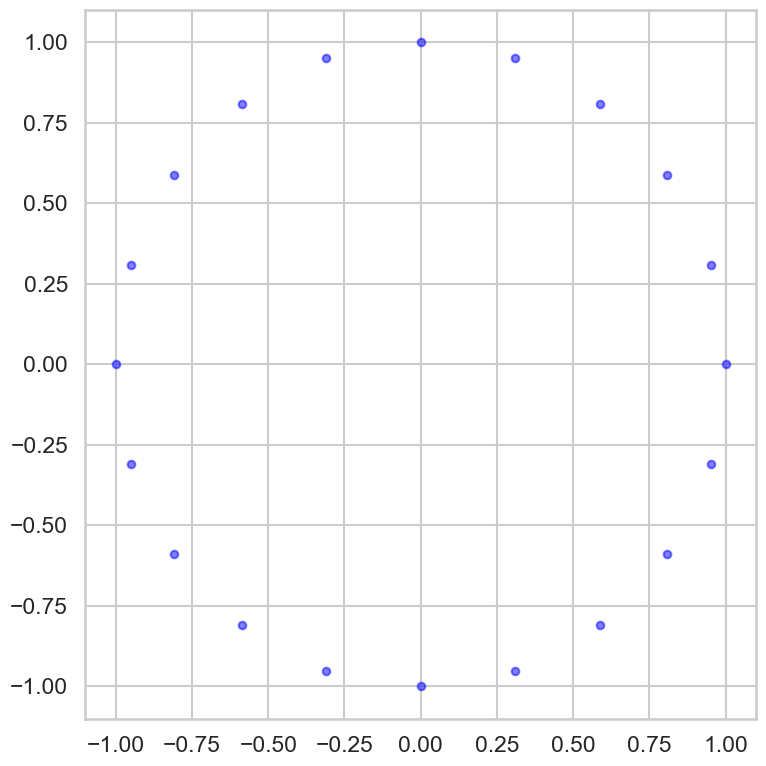

In [120]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()


display_cluster(X)


#### Applying K-Means 

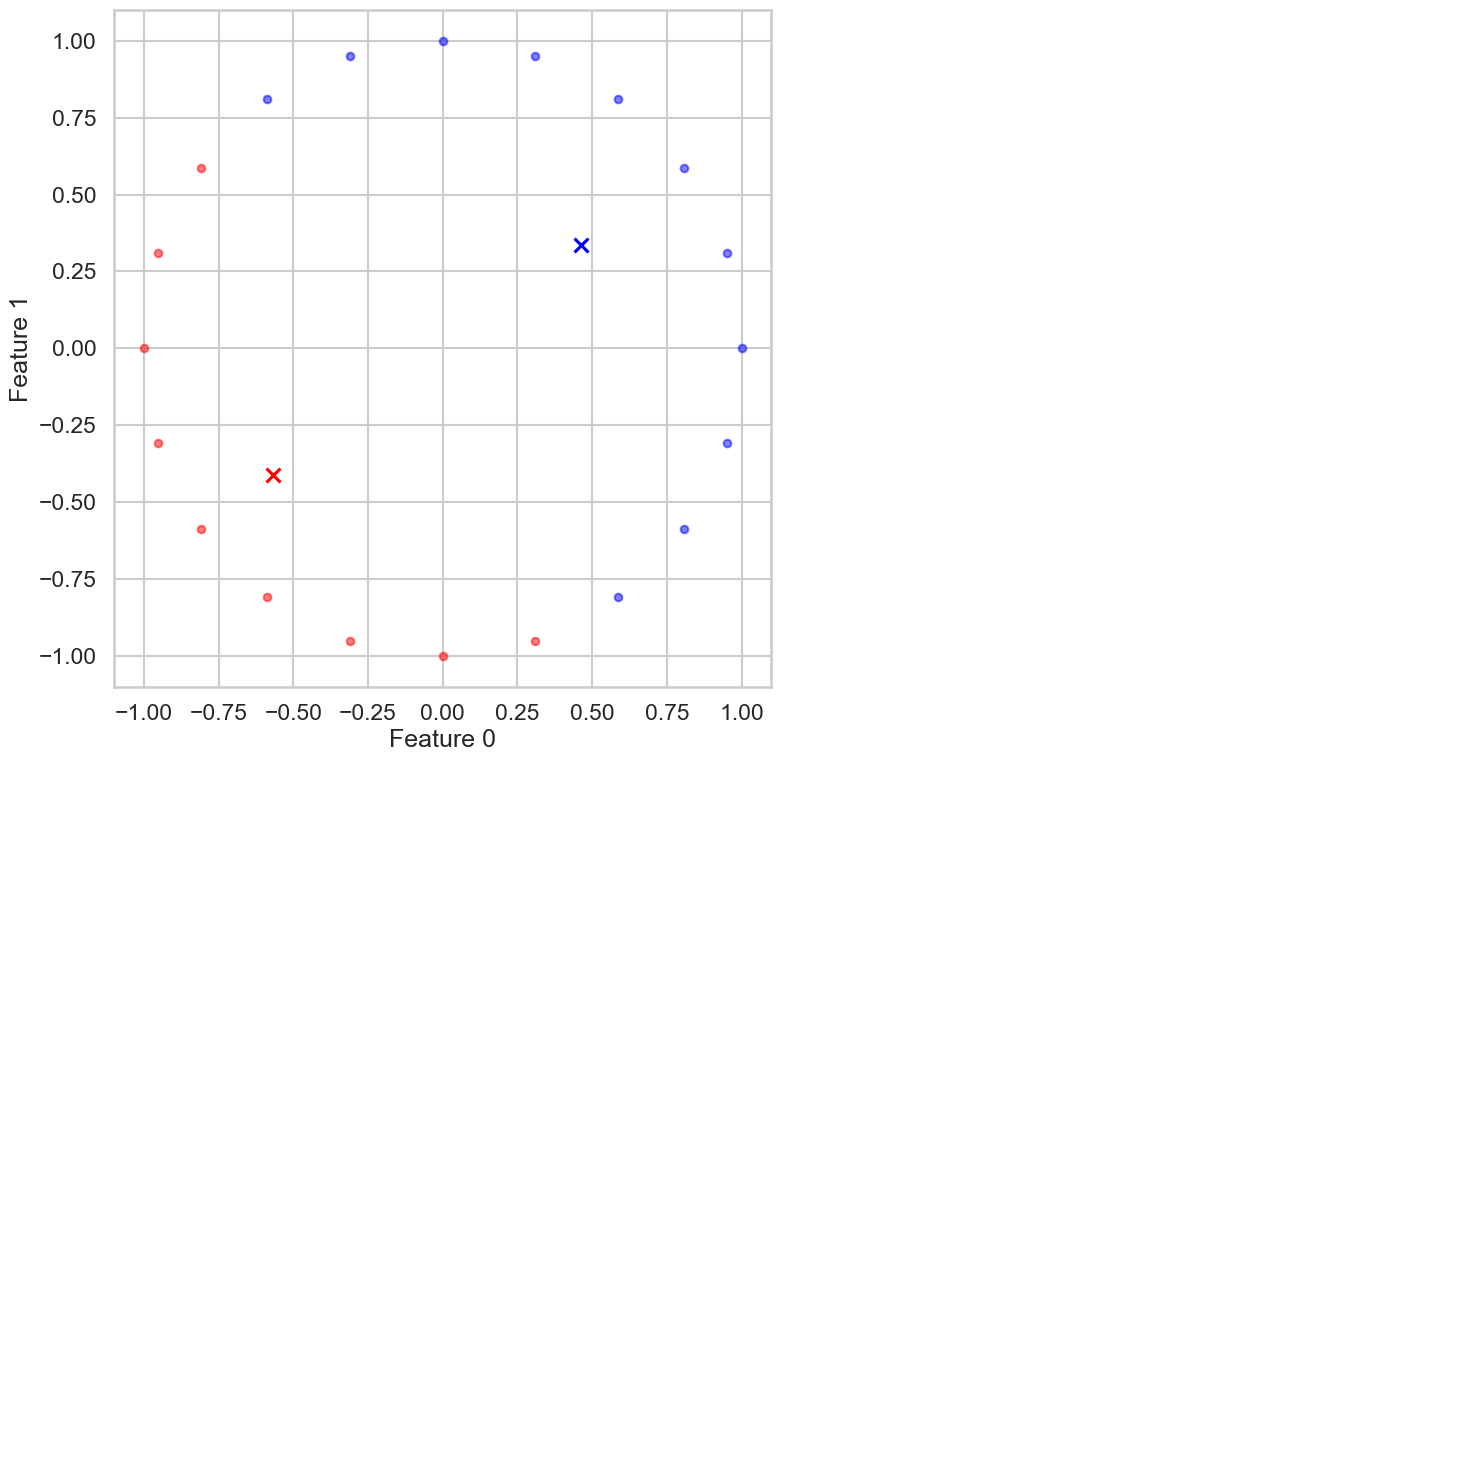

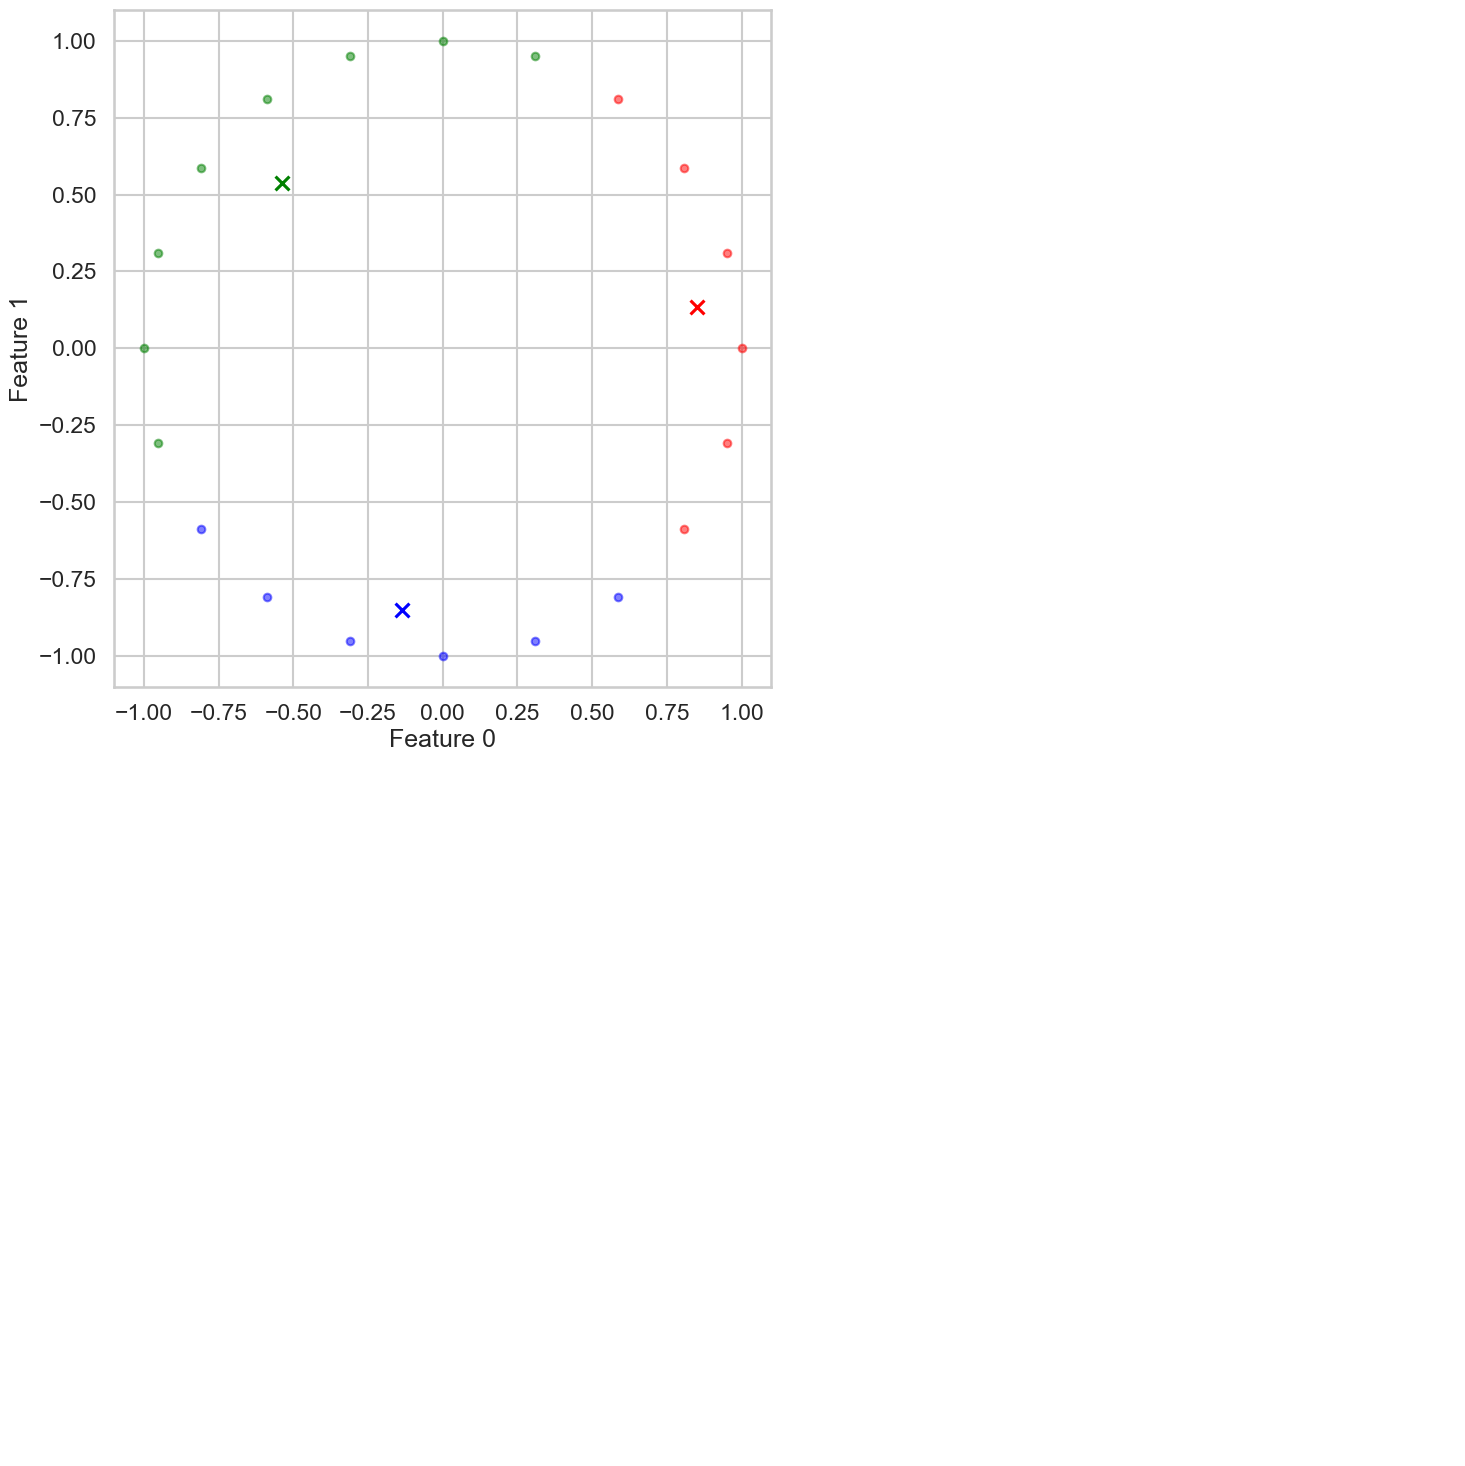

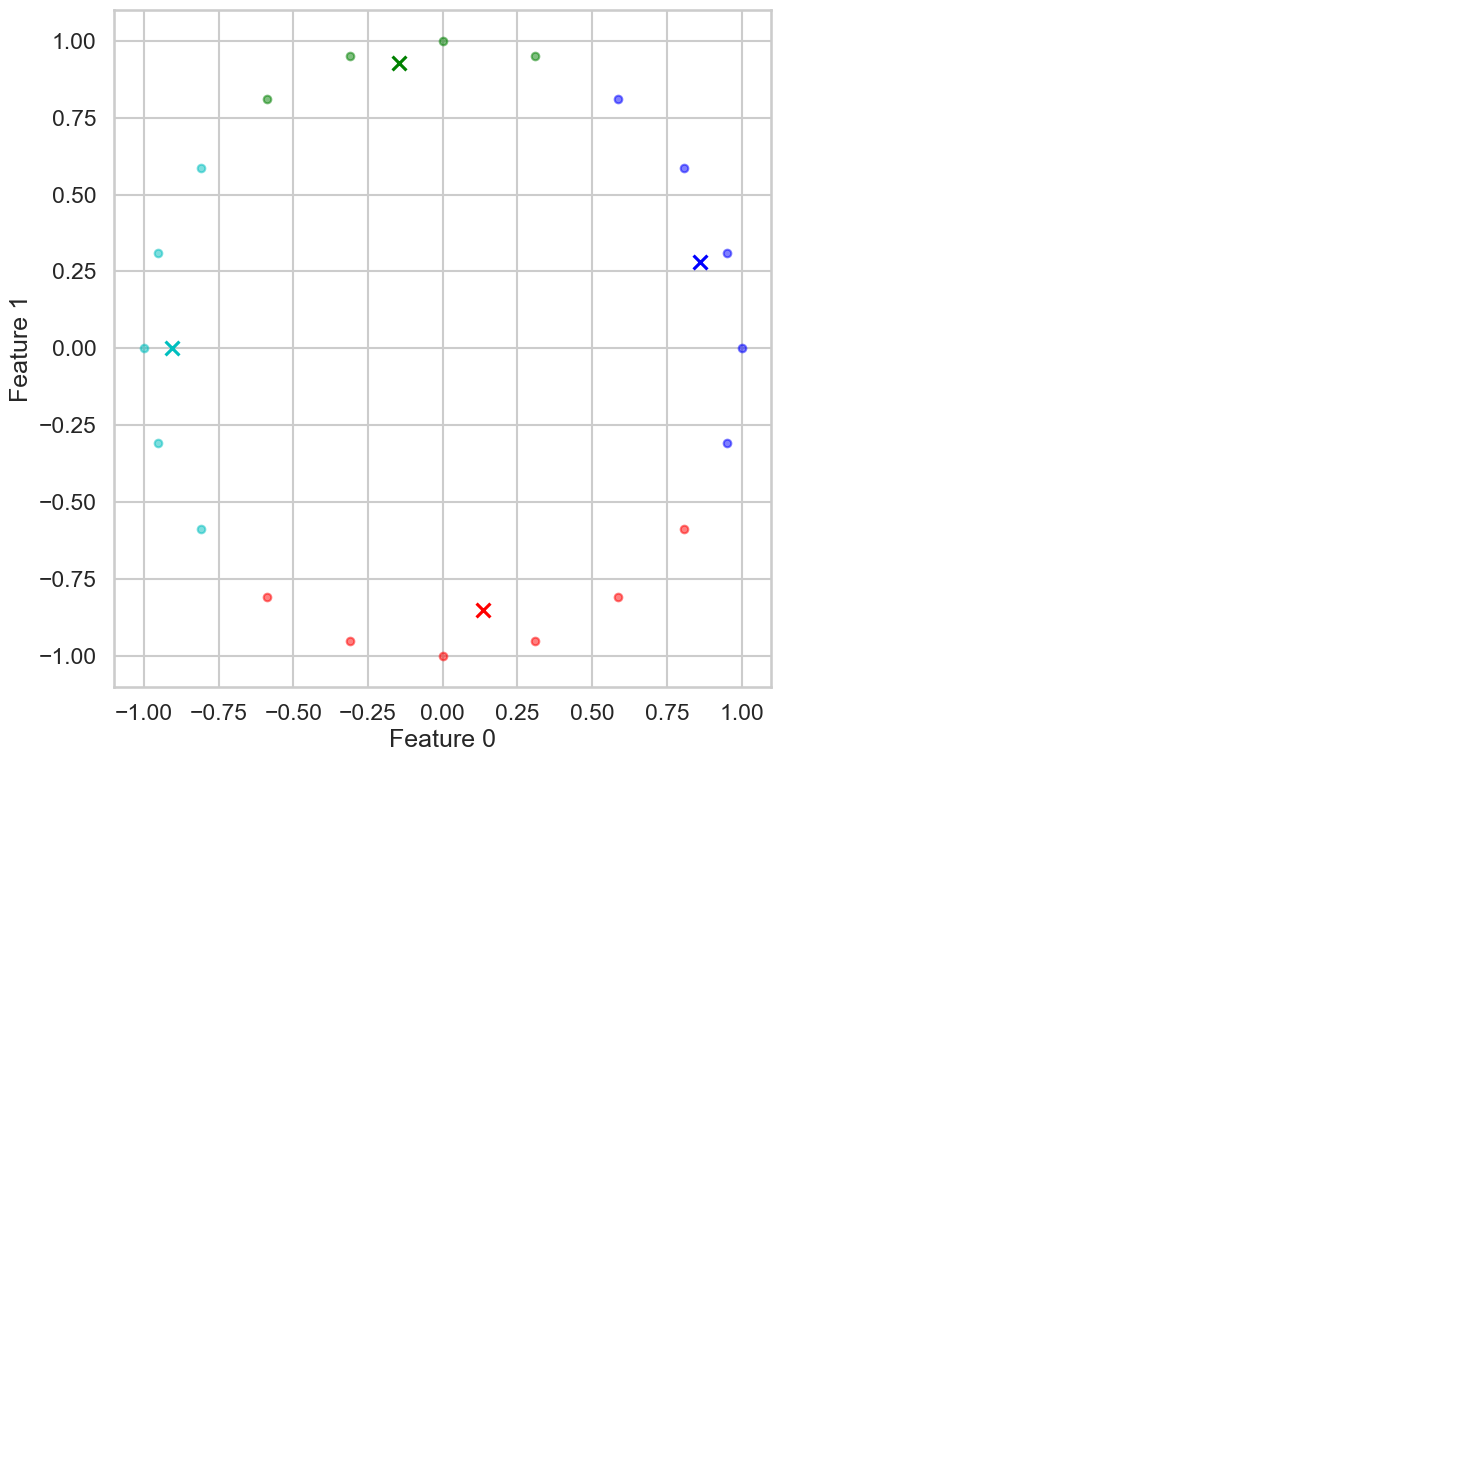

C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


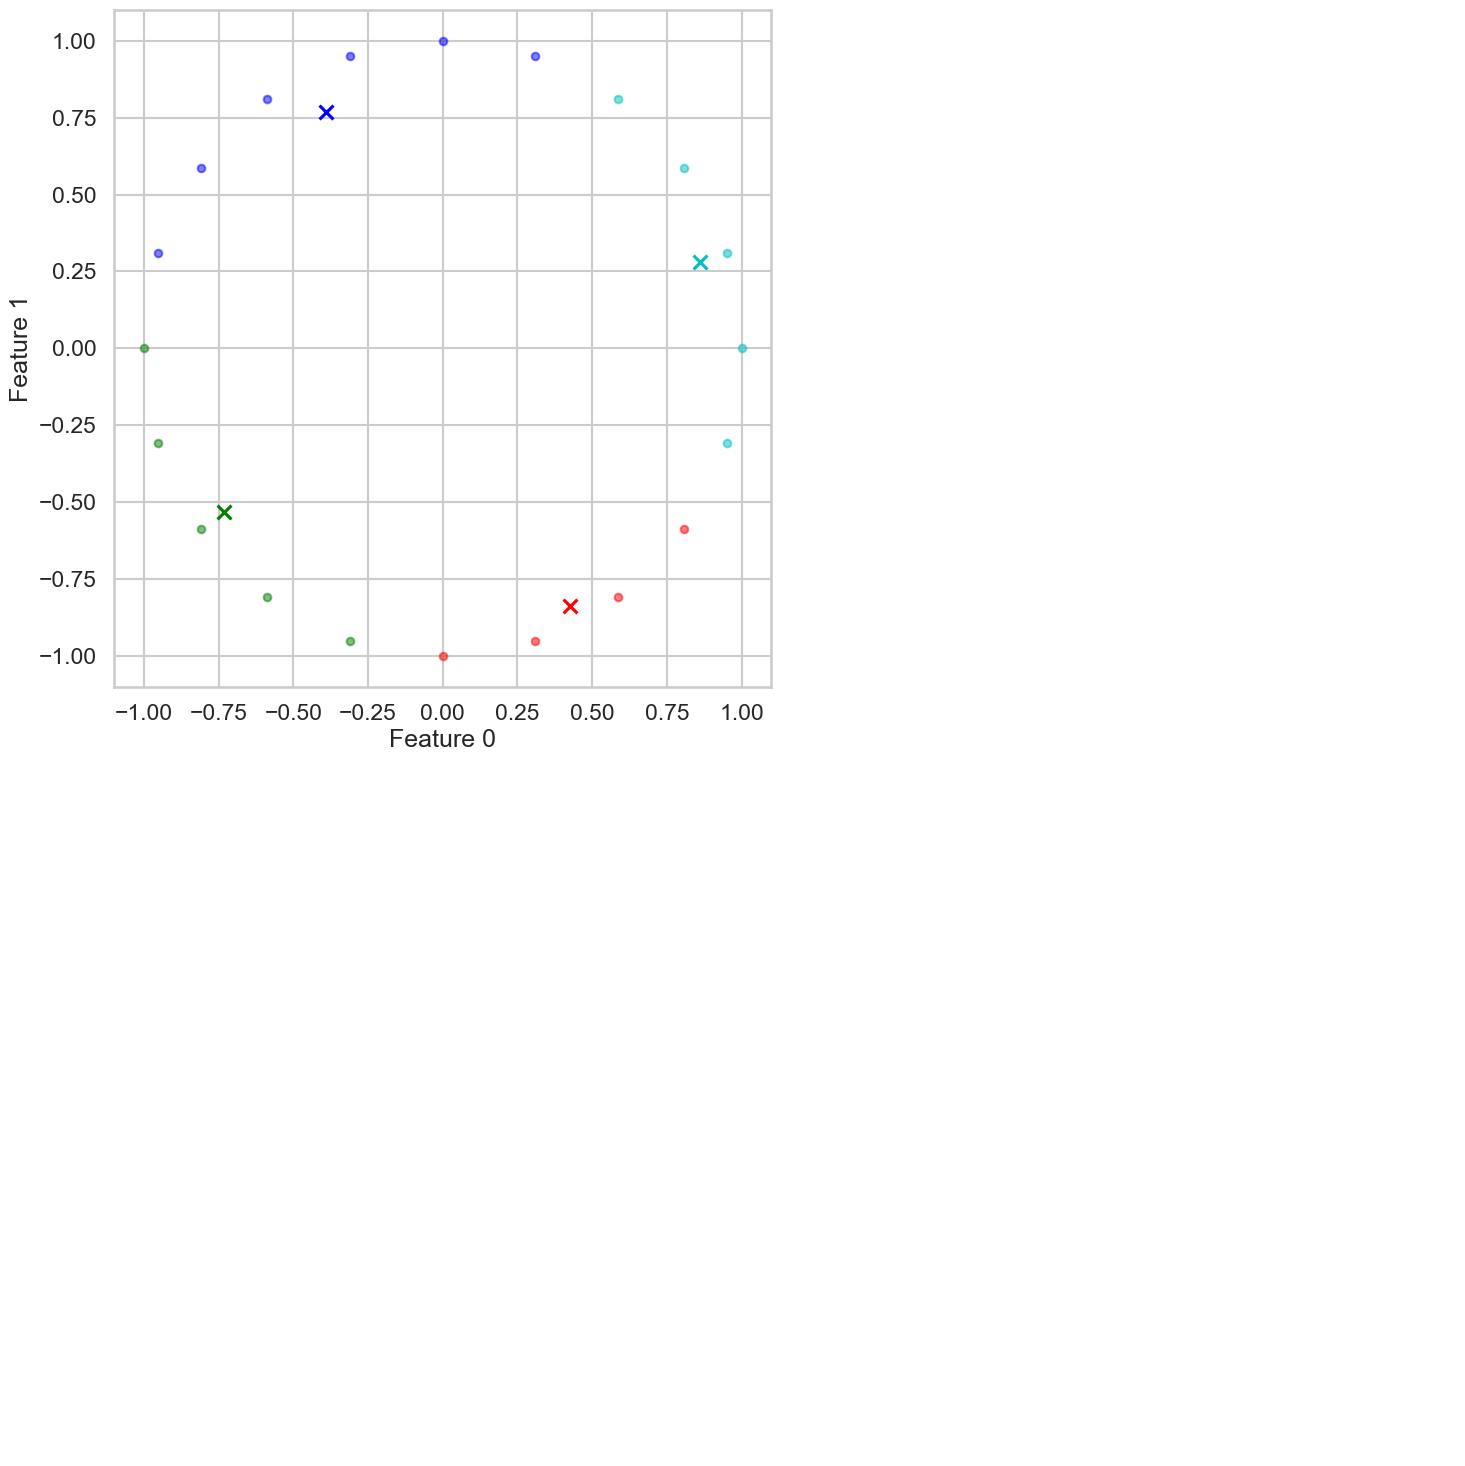

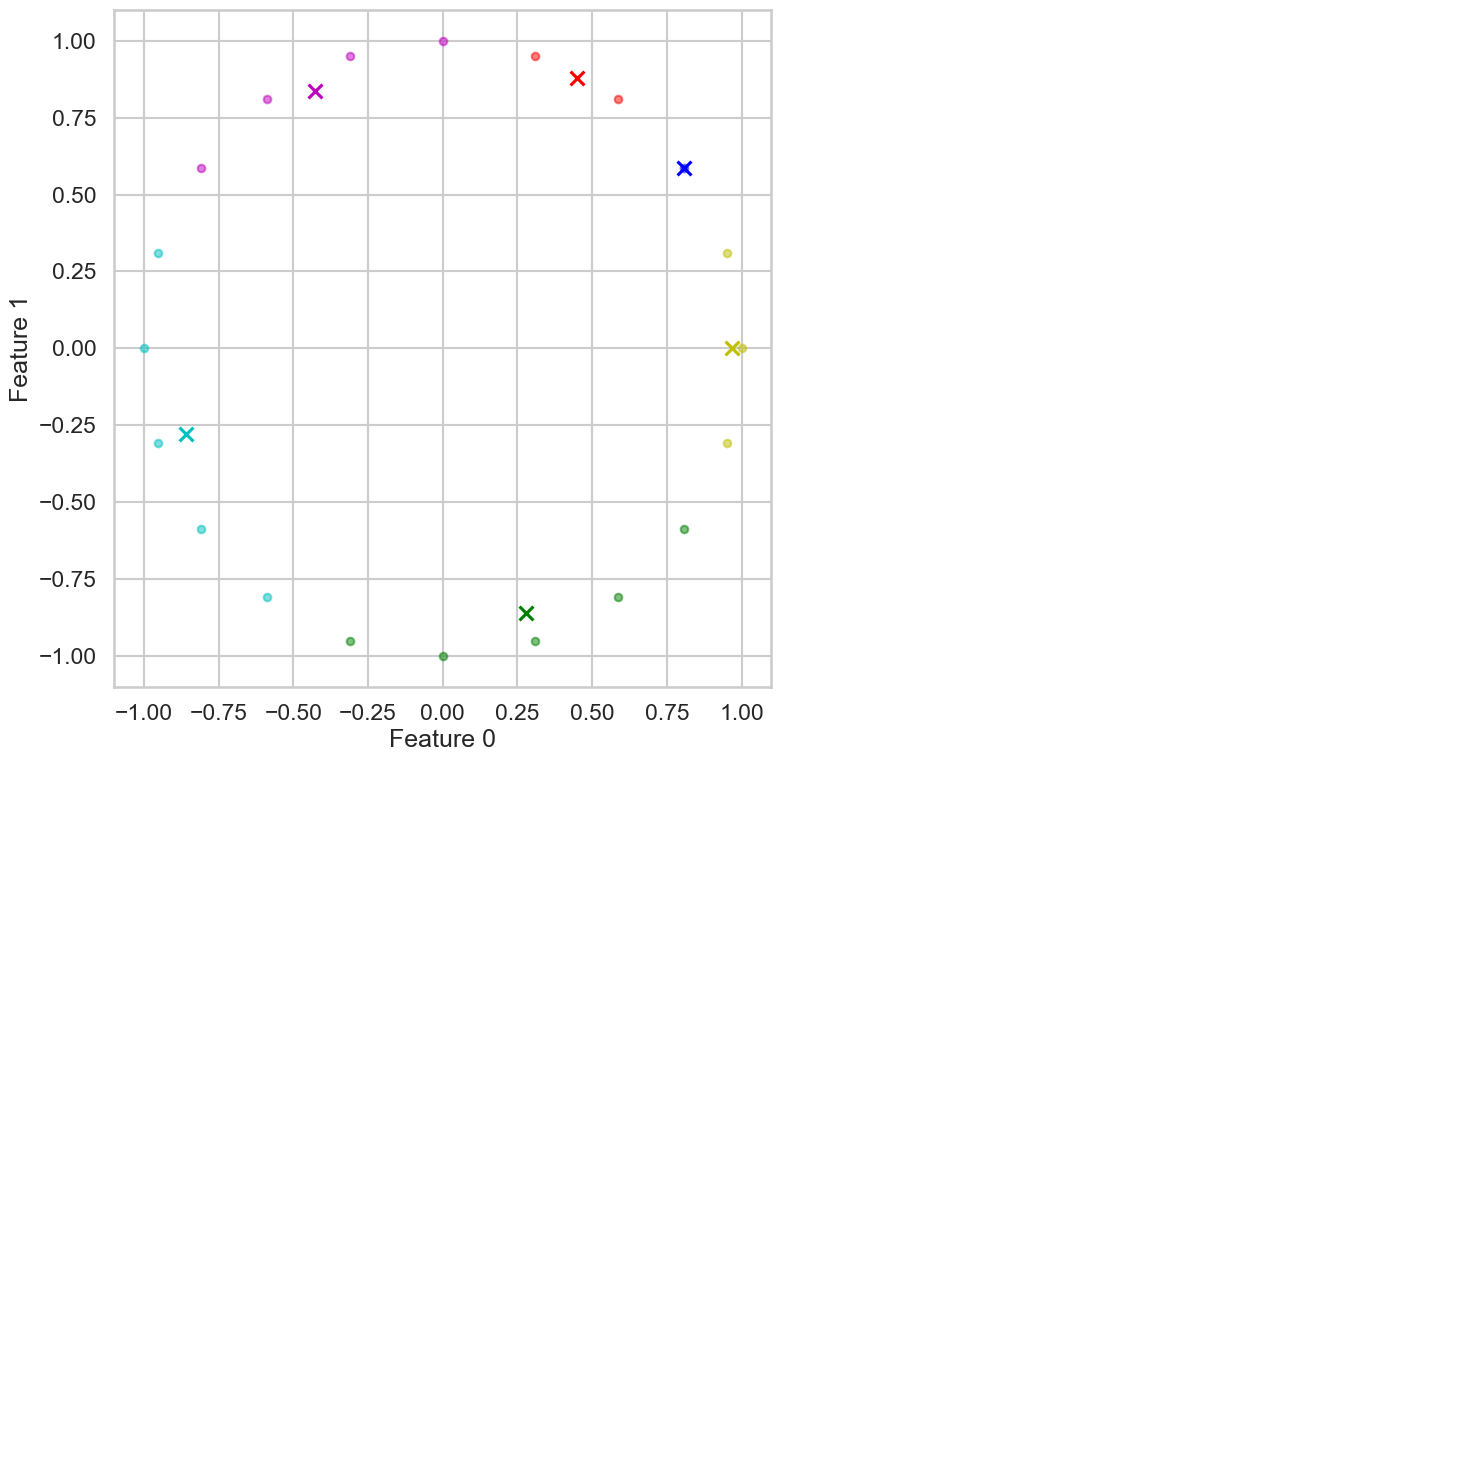

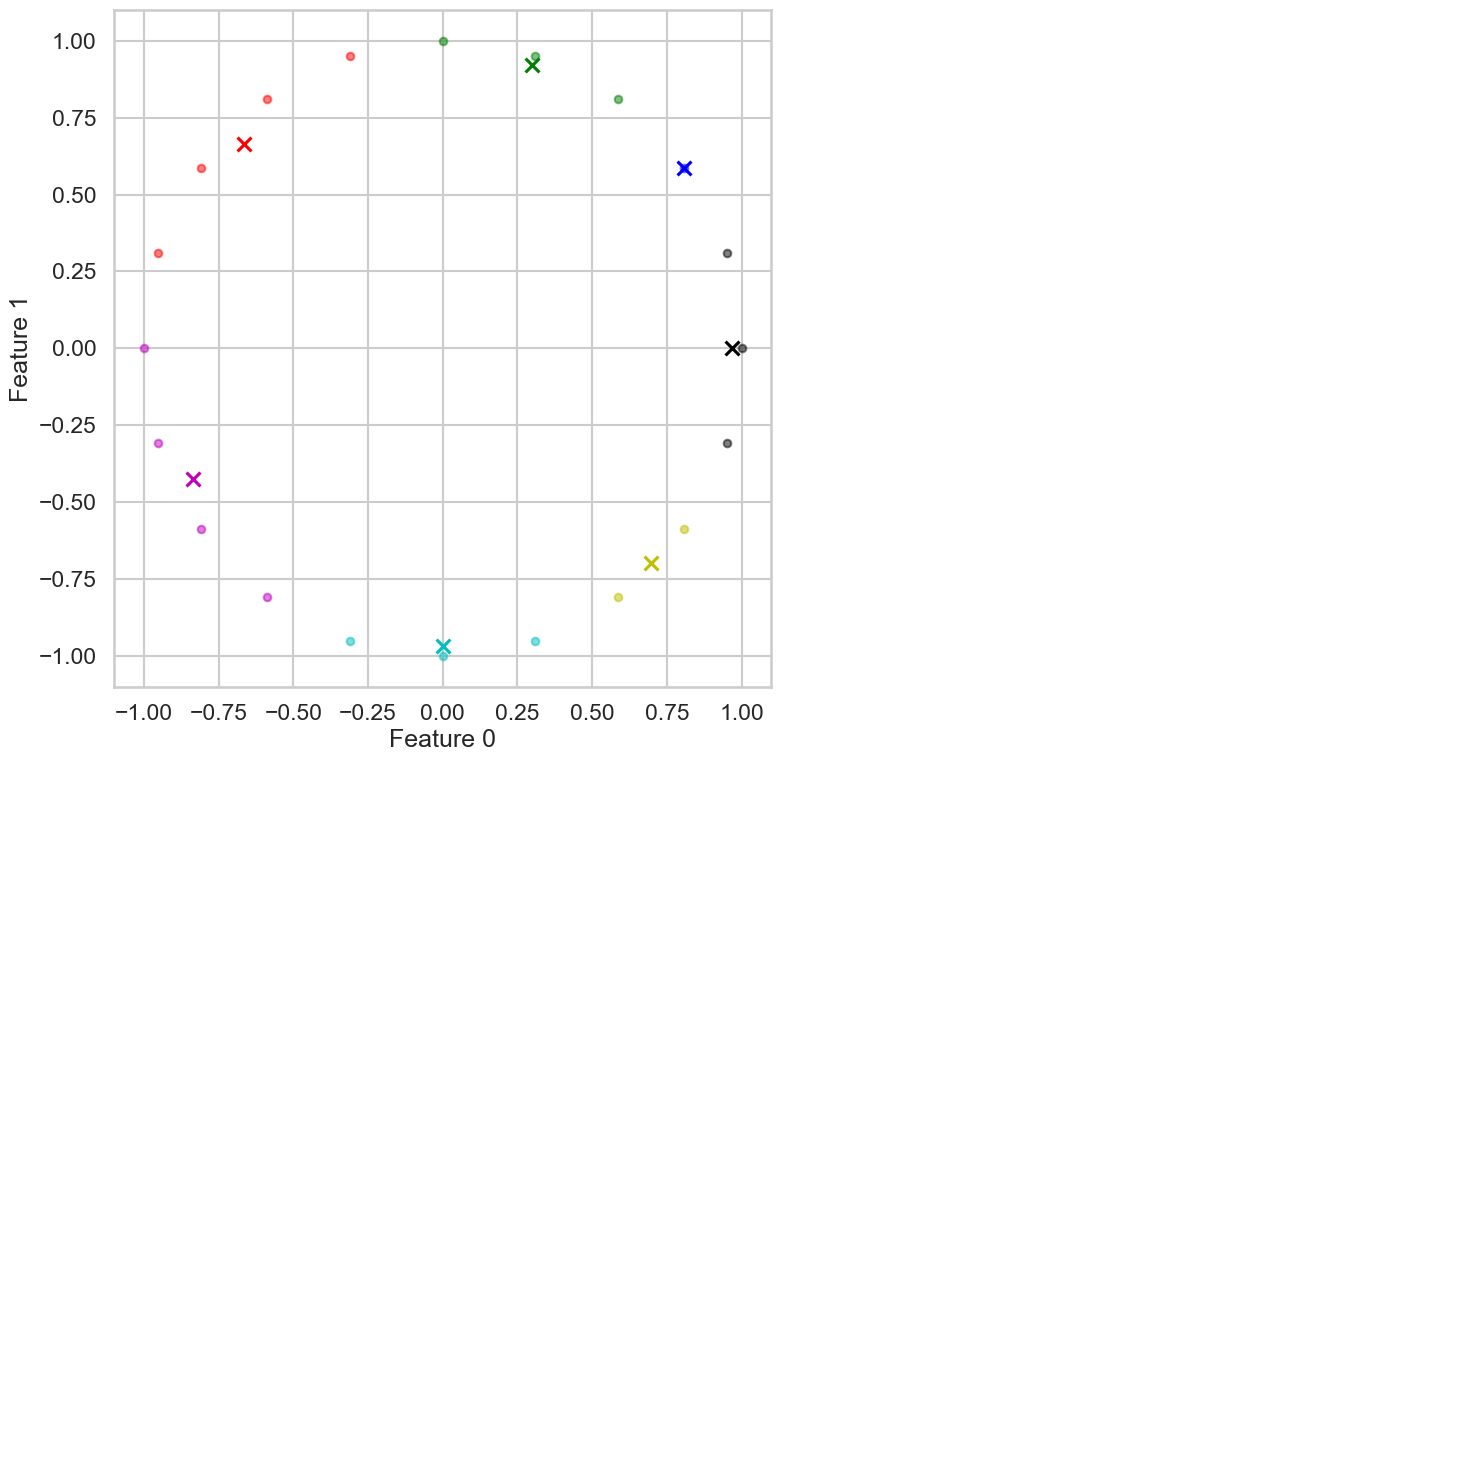

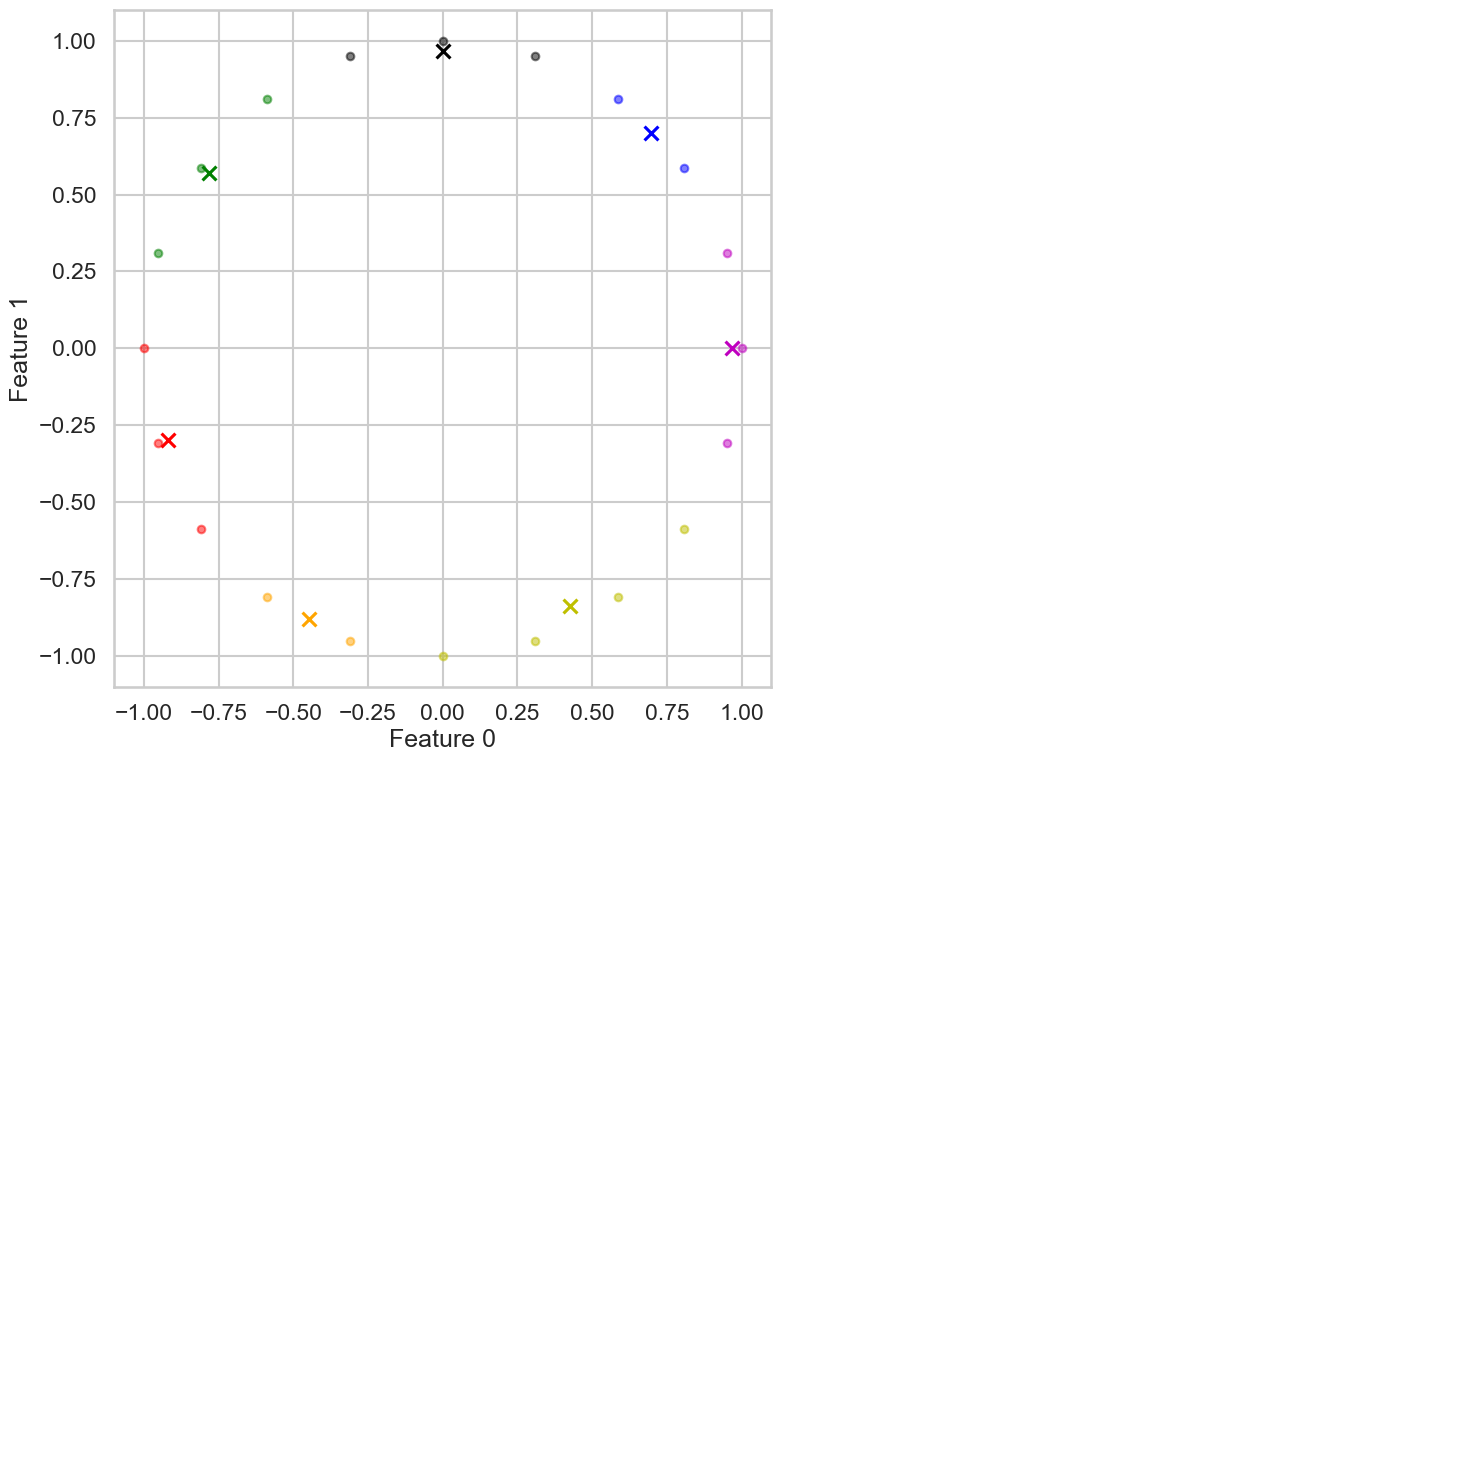

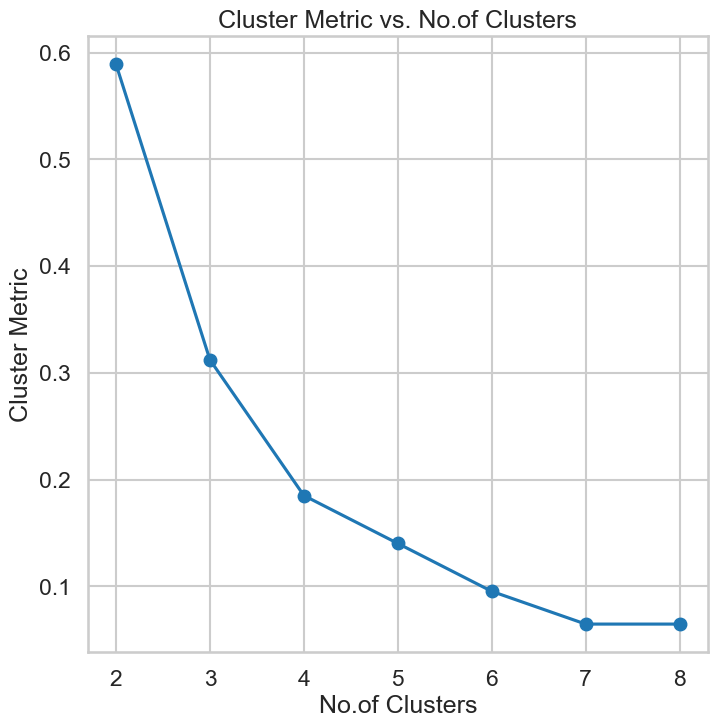

In [121]:
Cluster_Metric_Mean = np.zeros(8)
Ks = np.zeros(8)

for i in range(2,9):
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X,i,"Ecluidian distance",False)
    Cluster_Metric_Mean[i-1] = np.mean(Cluster_Metric)
    Ks[i-1] = i
    display_cluster(X, Final_Cluster_Distance, num_clusters=i)


for i in range(len(Cluster_Metric_Mean)):
    if np.isnan(Cluster_Metric_Mean[i]):
        # Take the mean of the neighboring values (before and after)
        before_value = Cluster_Metric_Mean[i-1] if i-1 >= 0 else np.nan
        after_value = Cluster_Metric_Mean[i+1] if i+1 < len(Cluster_Metric_Mean) else np.nan
        Cluster_Metric_Mean[i] = np.nanmean([before_value, after_value])
        
# Plot the graph
plt.plot(Ks[1:], Cluster_Metric_Mean[1:], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()

# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 


> #### 2.3. Example 2 : Multi blob Data Gen and display 

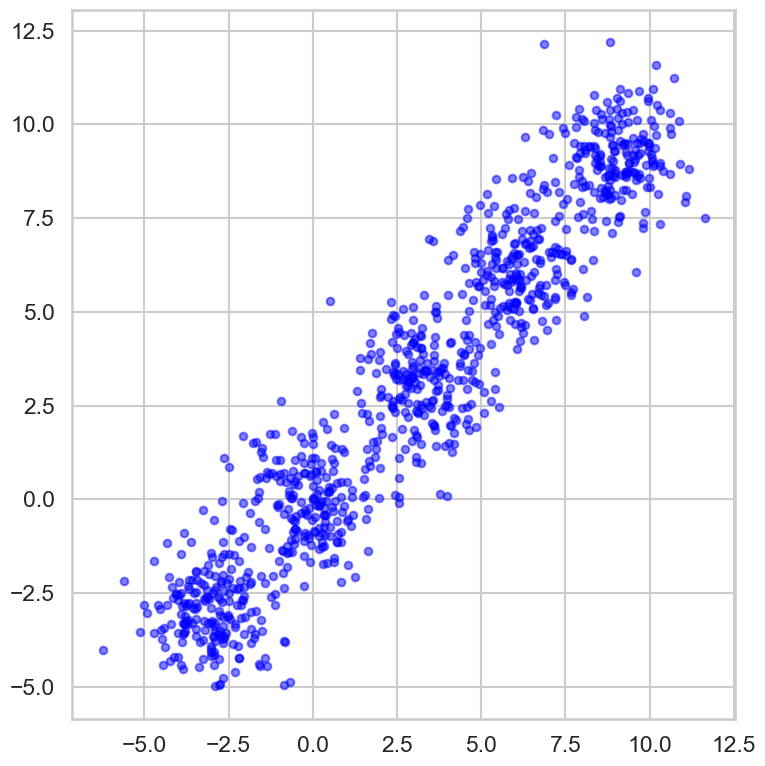

In [122]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### Applying K-Means

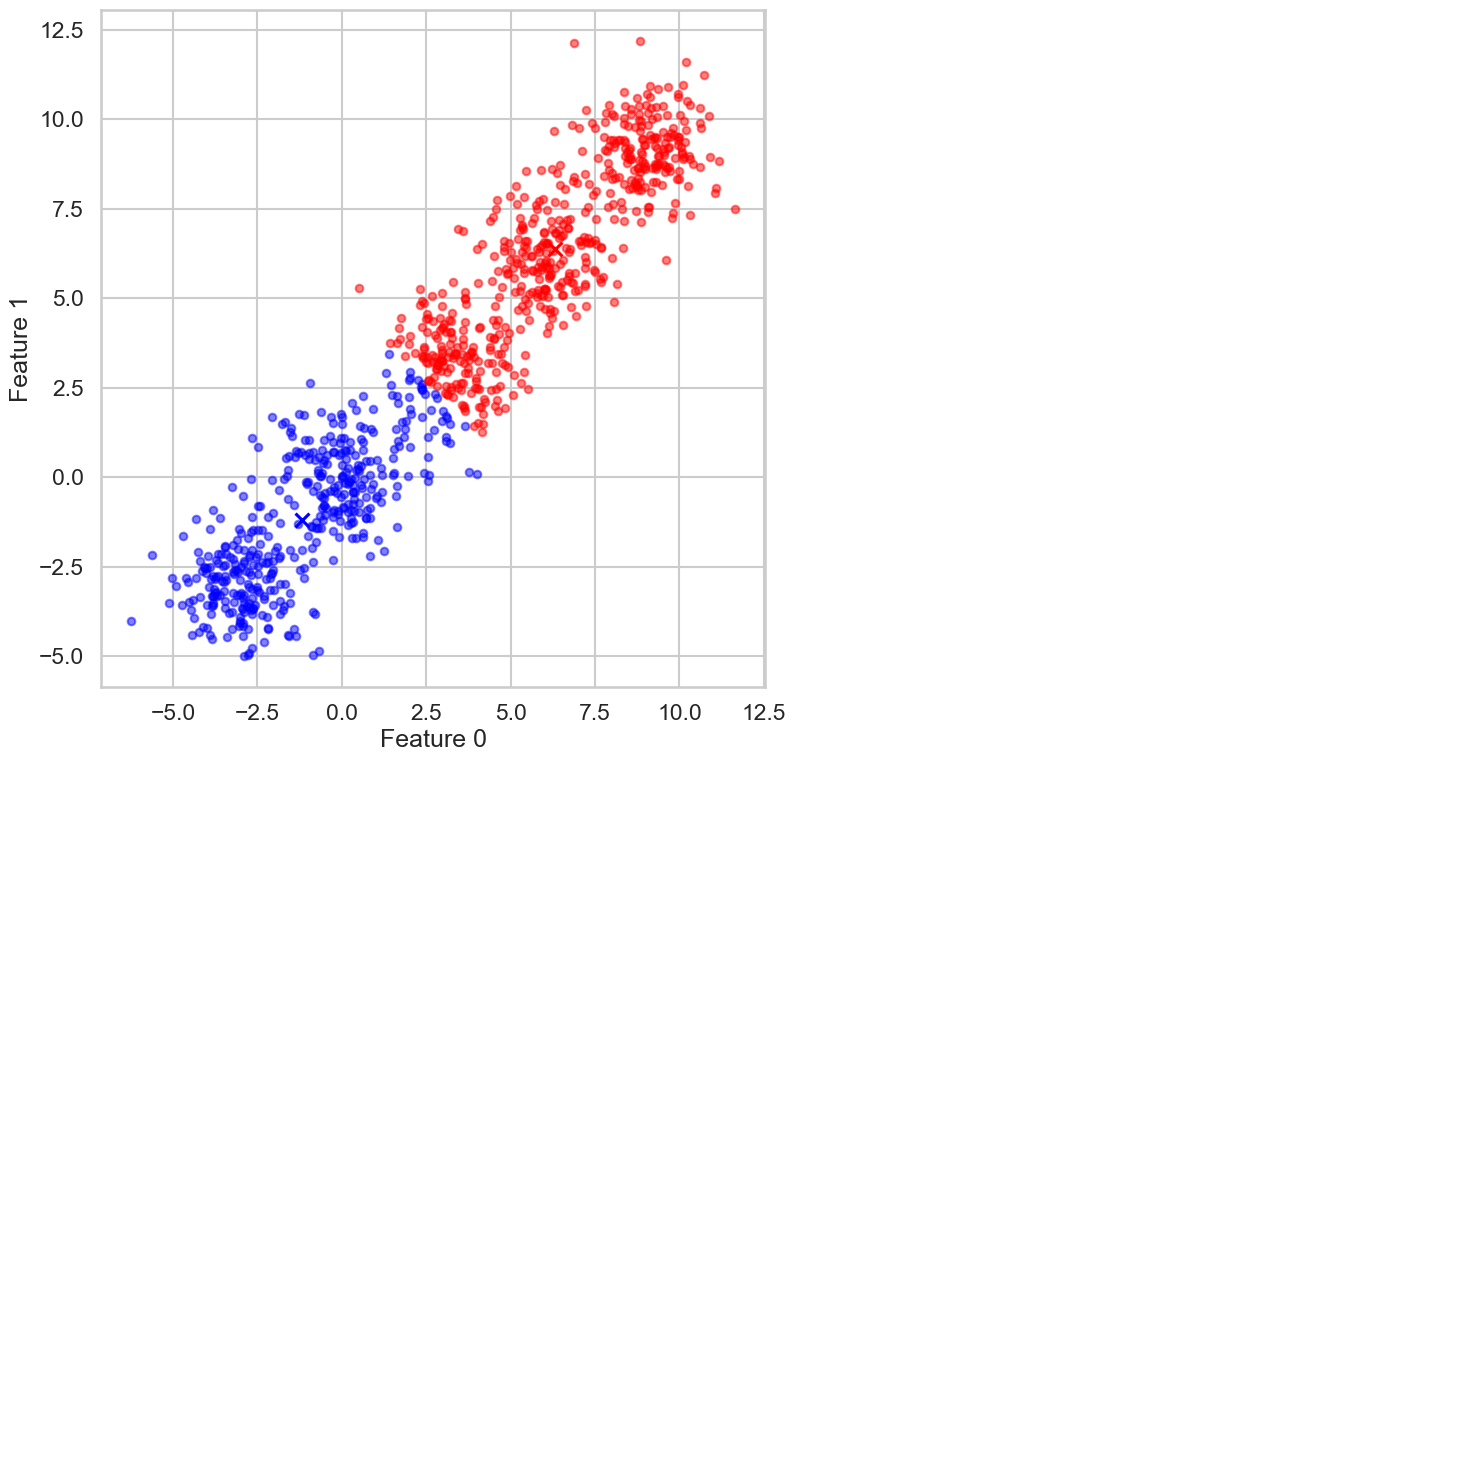

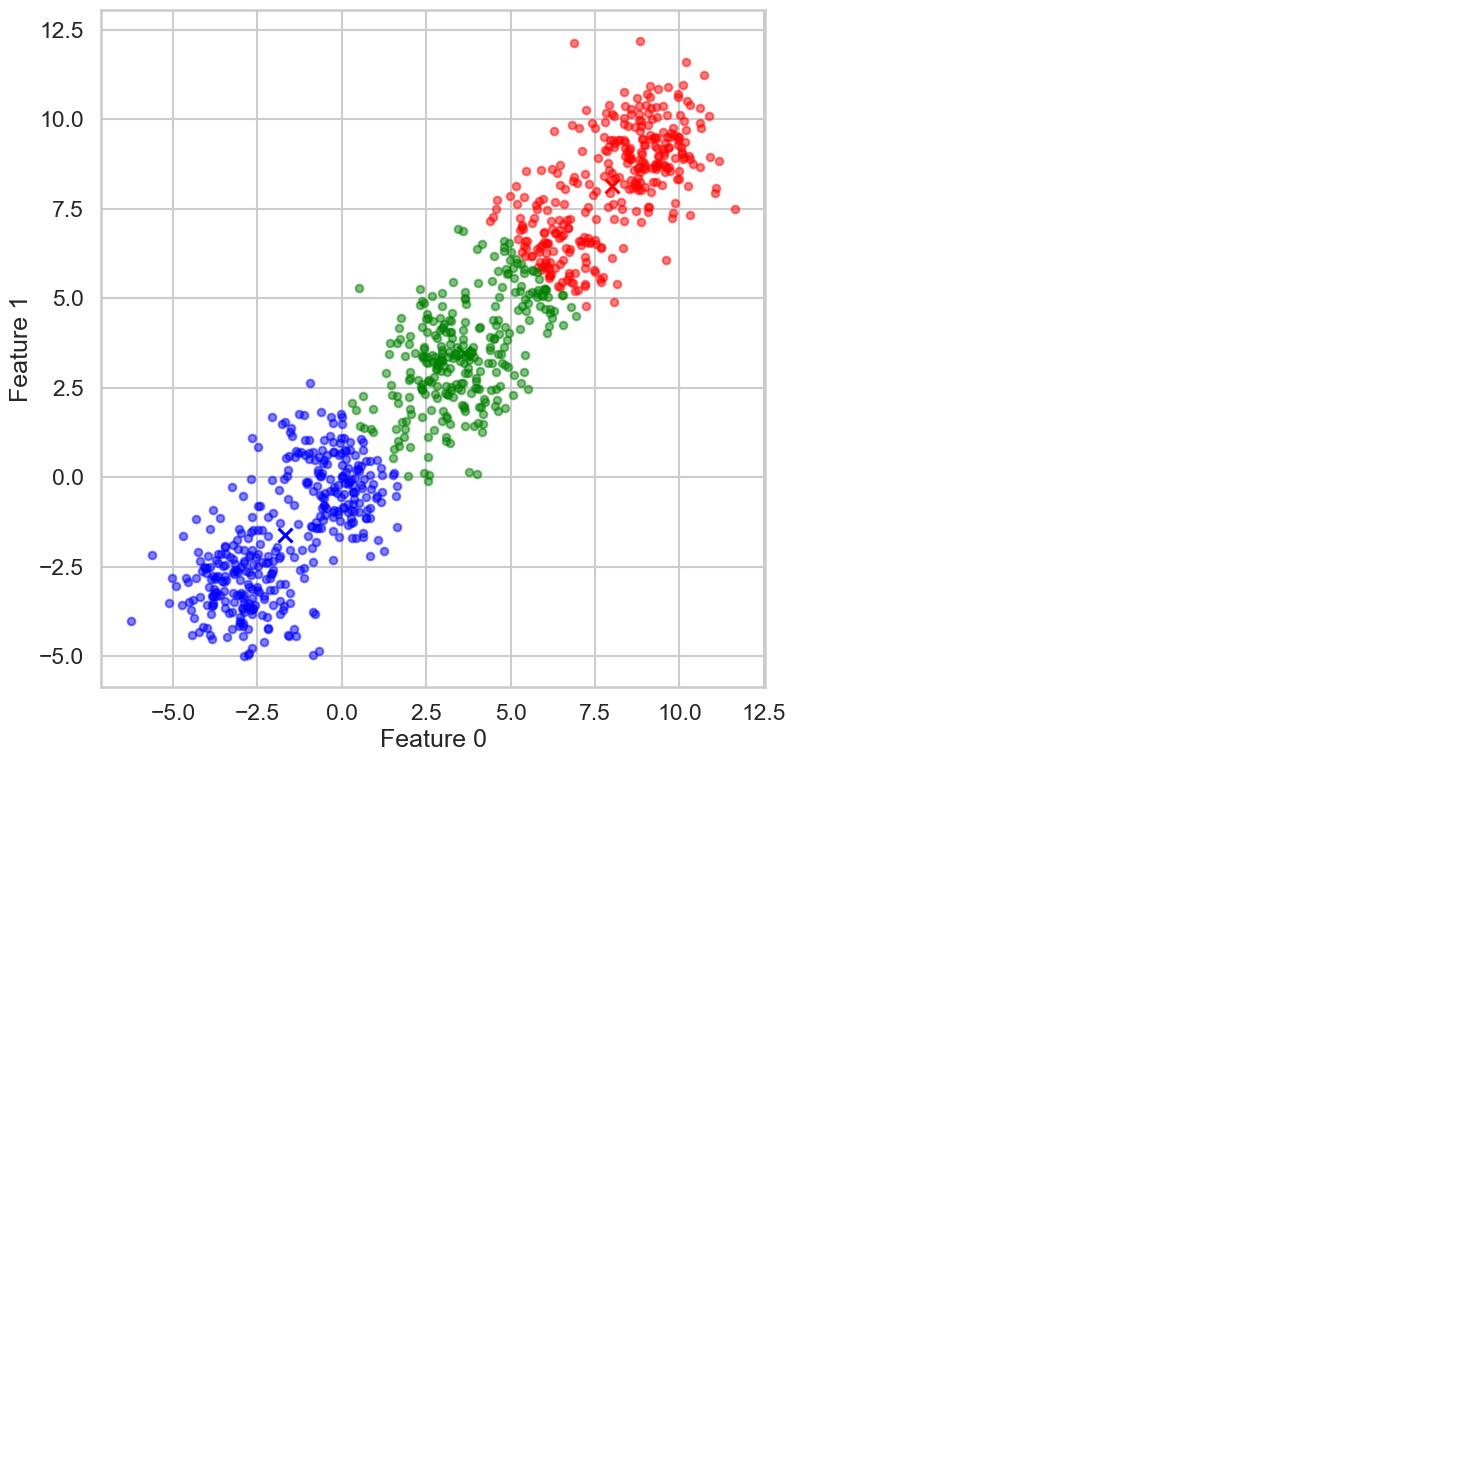

C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


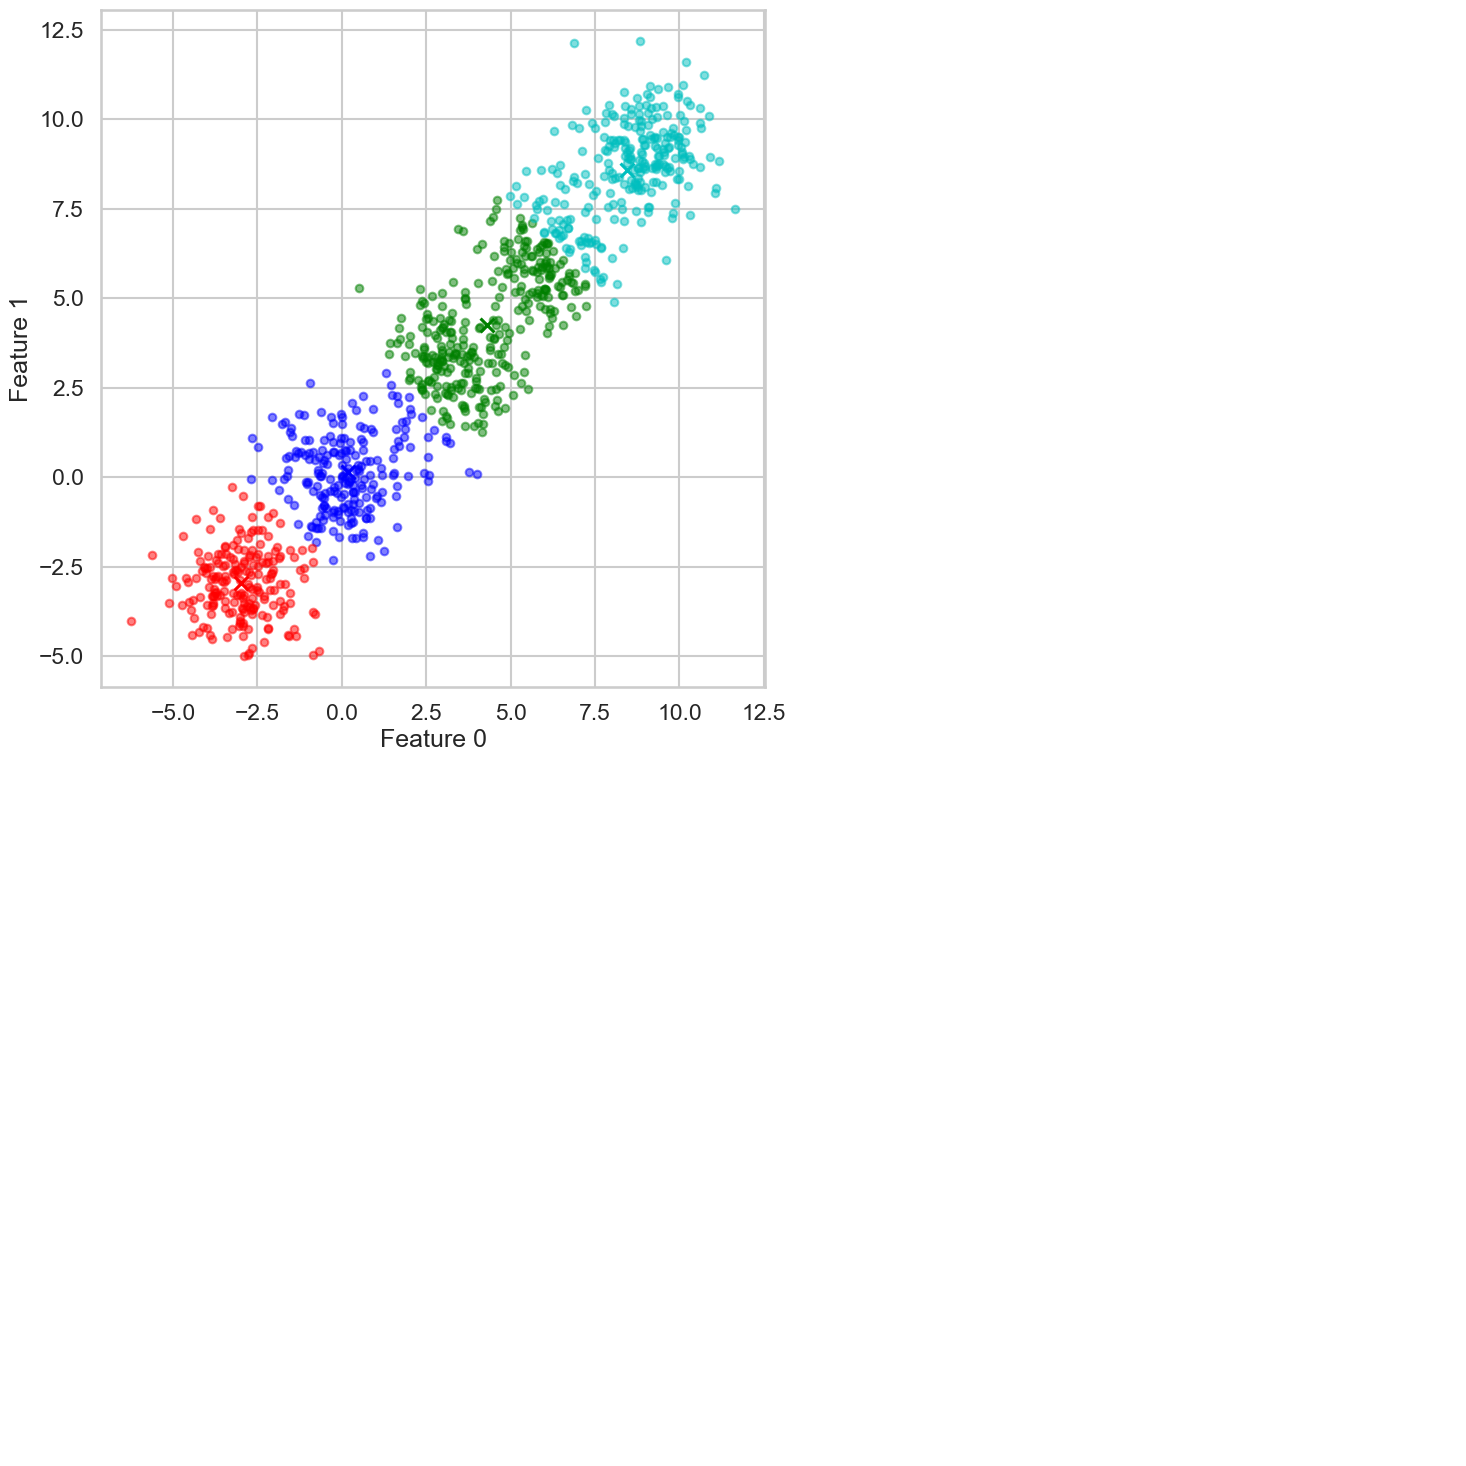

C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


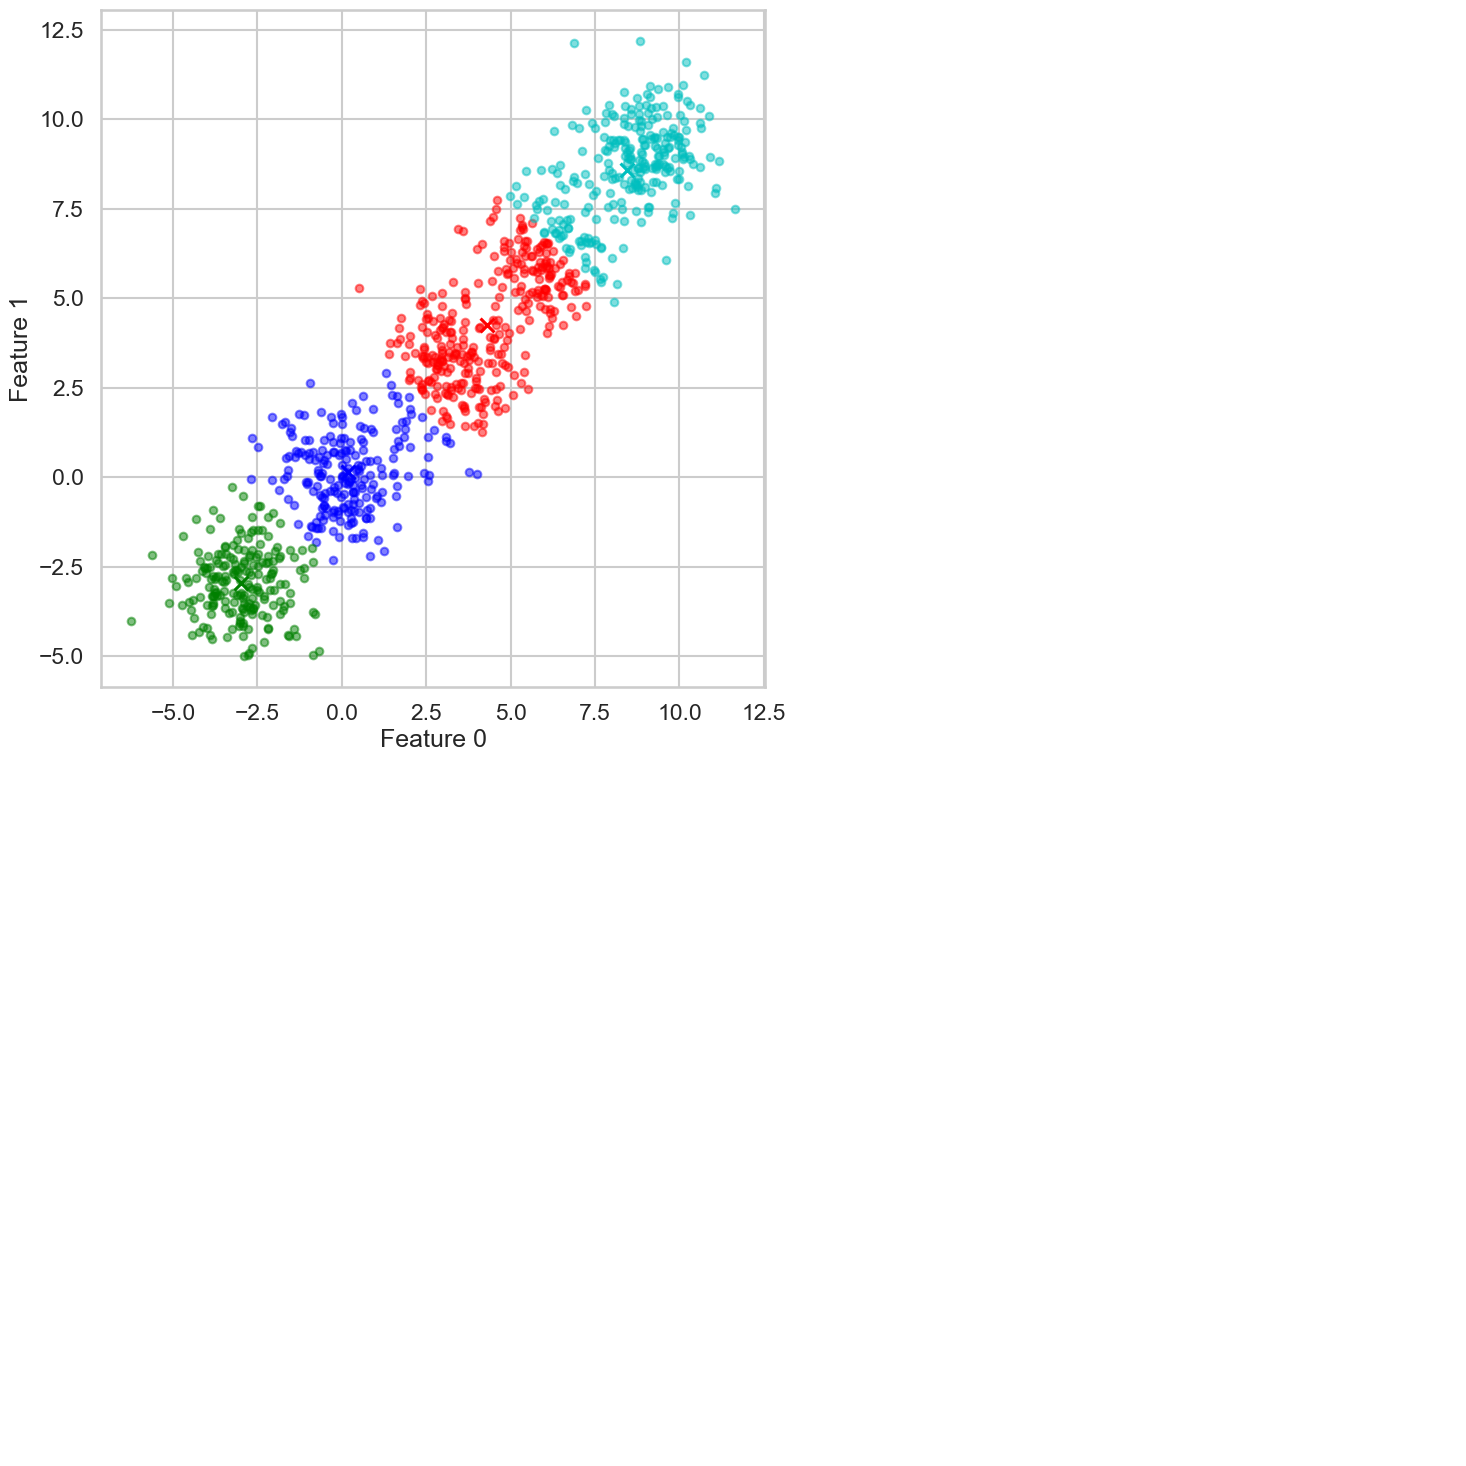

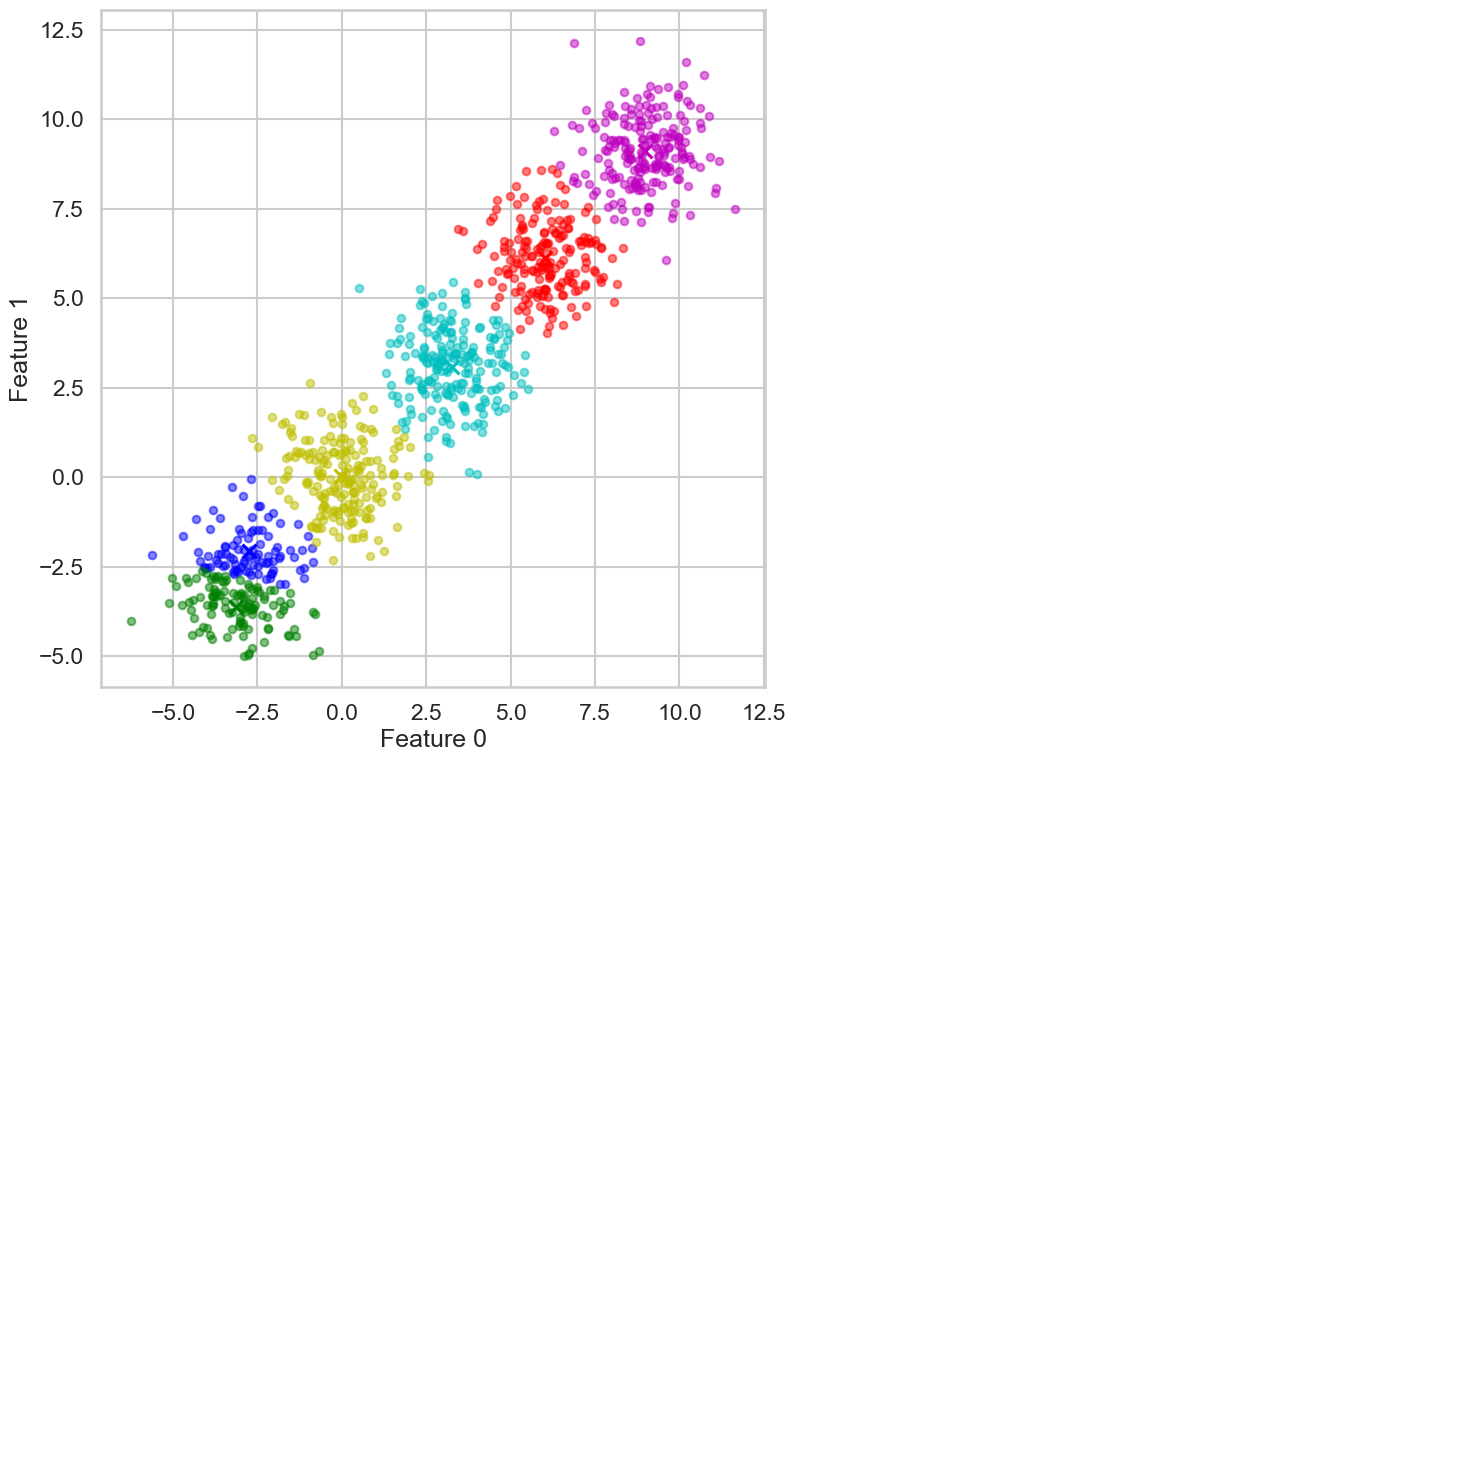

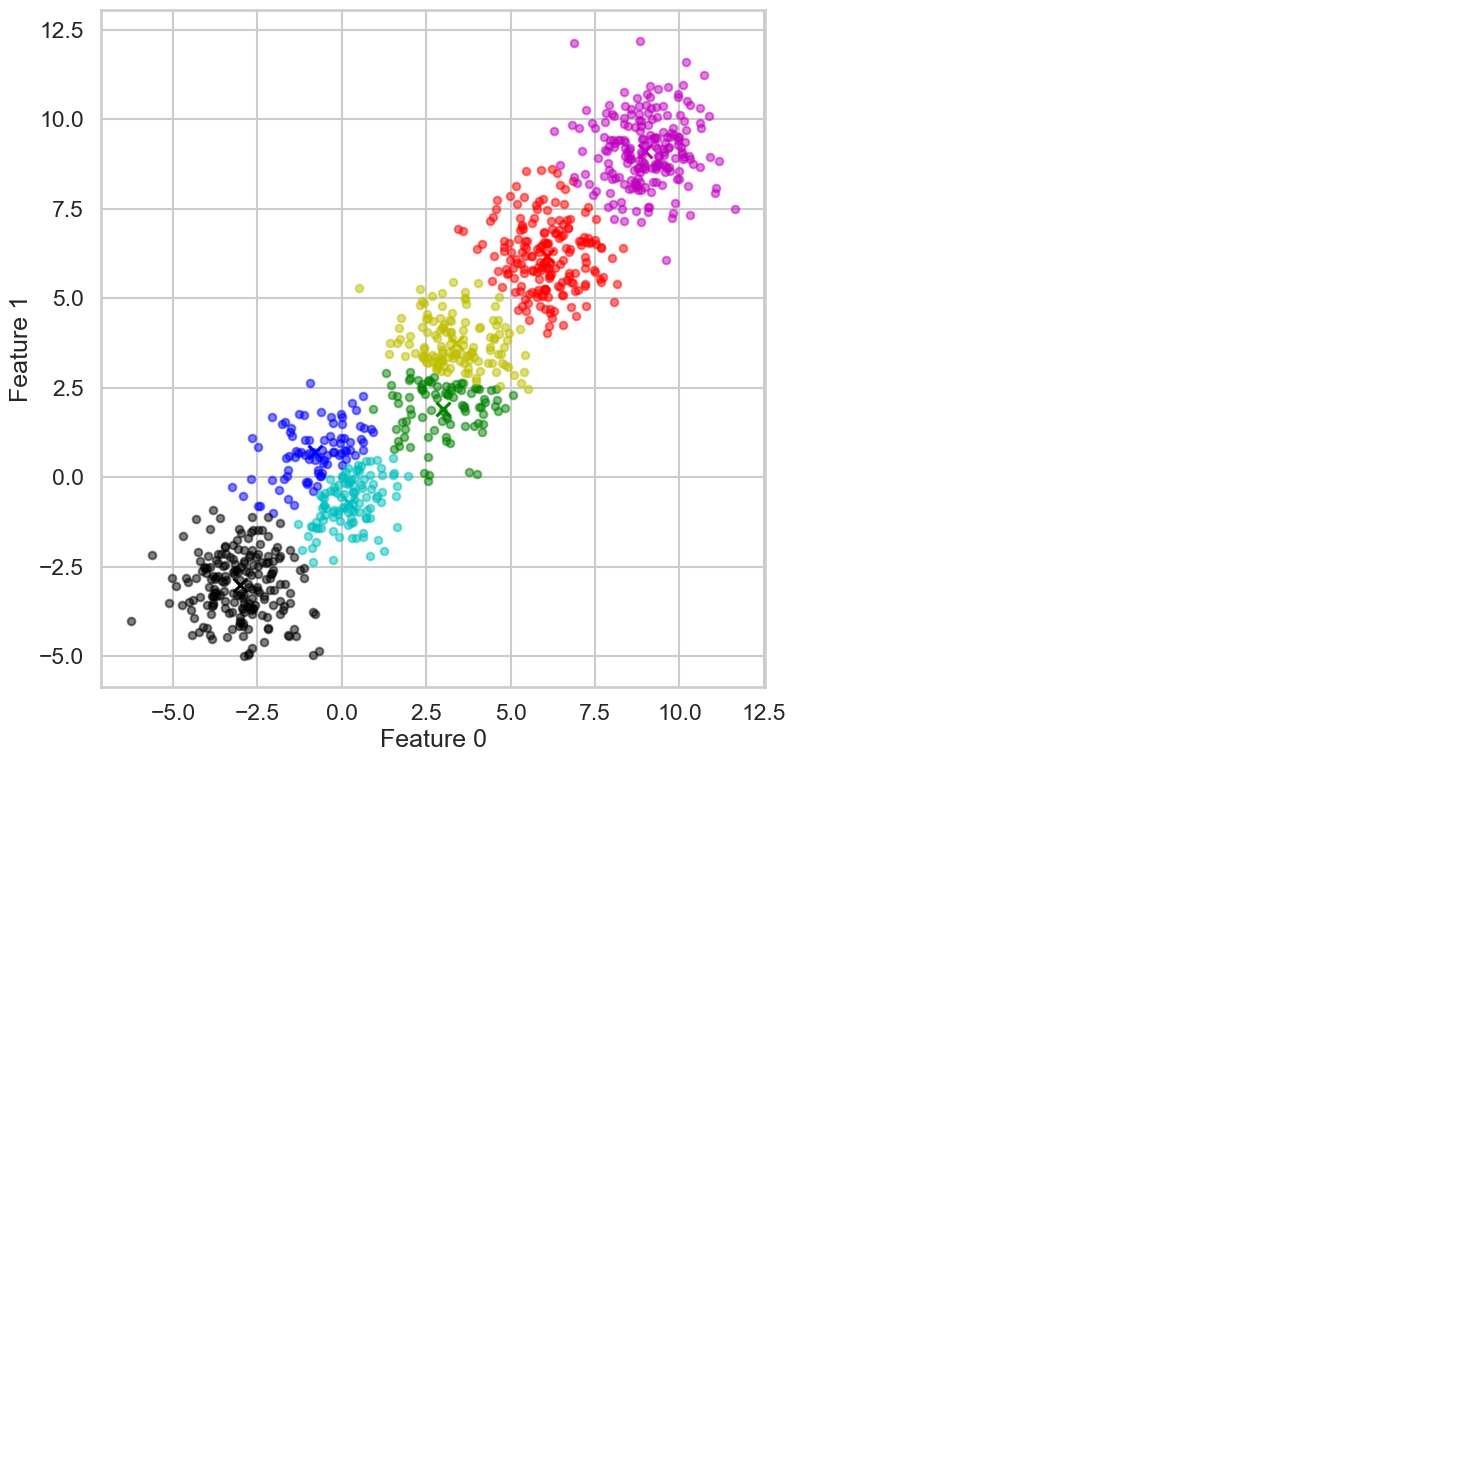

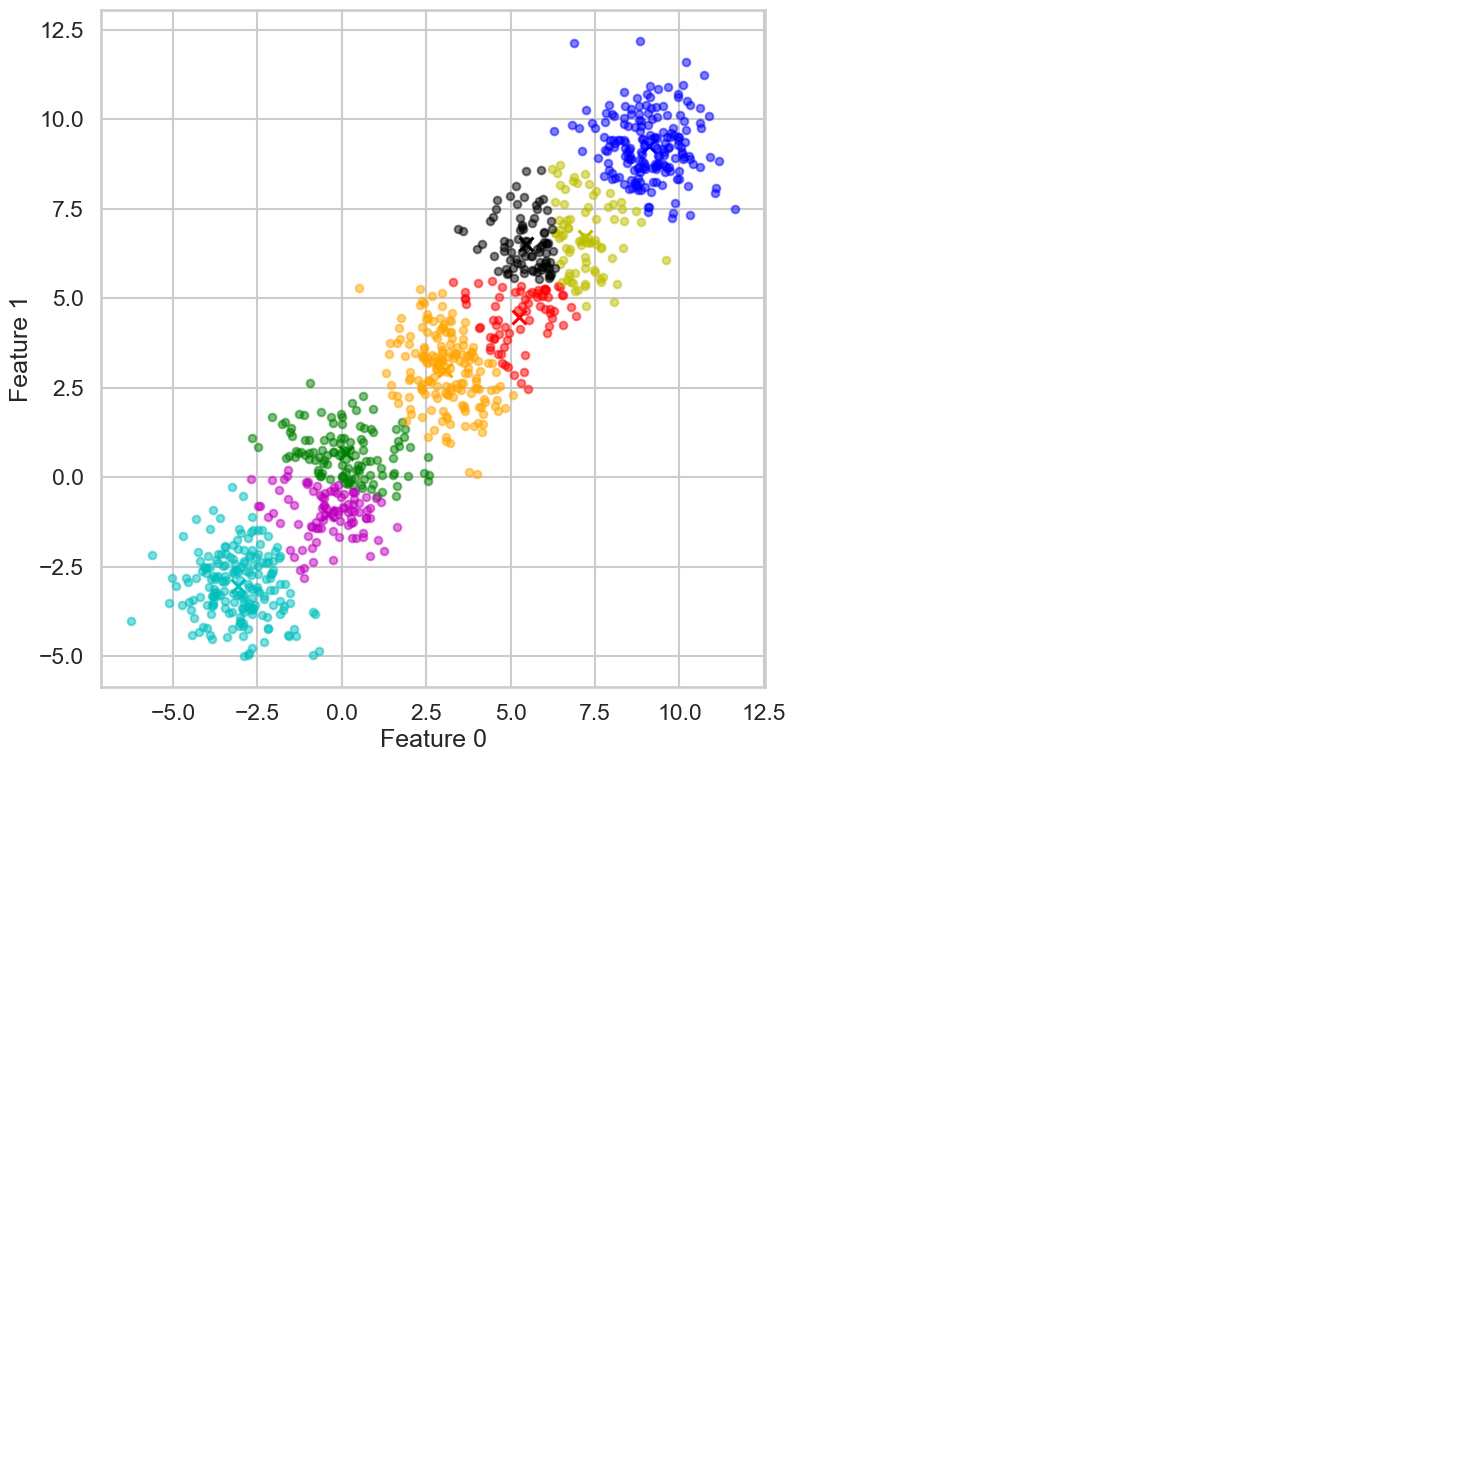

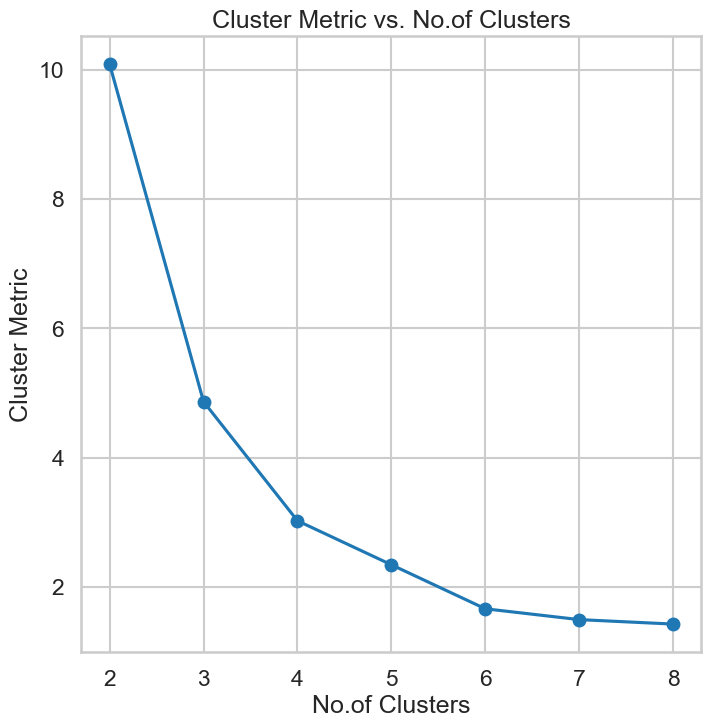

In [123]:
Cluster_Metric_Mean = np.zeros(8)
Ks = np.zeros(8)

for i in range(2,9):
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X,i,"Ecluidian distance",False)
    Cluster_Metric_Mean[i-1] = np.mean(Cluster_Metric)
    Ks[i-1] = i
    display_cluster(X, Final_Cluster_Distance, num_clusters=i)


for i in range(len(Cluster_Metric_Mean)):
    if np.isnan(Cluster_Metric_Mean[i]):
        # Take the mean of the neighboring values (before and after)
        before_value = Cluster_Metric_Mean[i-1] if i-1 >= 0 else np.nan
        after_value = Cluster_Metric_Mean[i+1] if i+1 < len(Cluster_Metric_Mean) else np.nan
        Cluster_Metric_Mean[i] = np.nanmean([before_value, after_value])
        
# Plot the graph
plt.plot(Ks[1:], Cluster_Metric_Mean[1:], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()


#### 2.3. Example 3 : moons Data Gen and display 

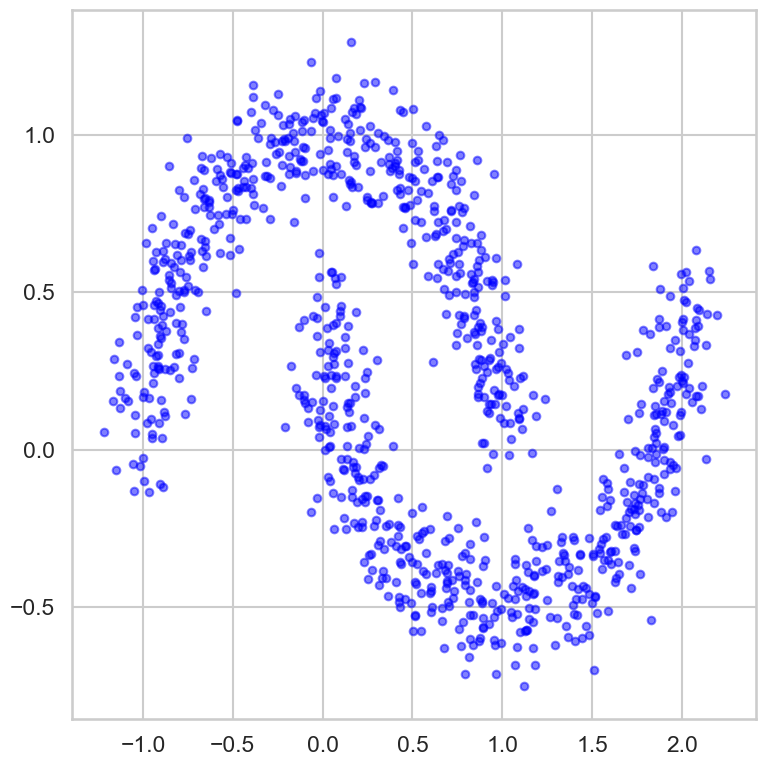

In [124]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

#### Applying K-Means

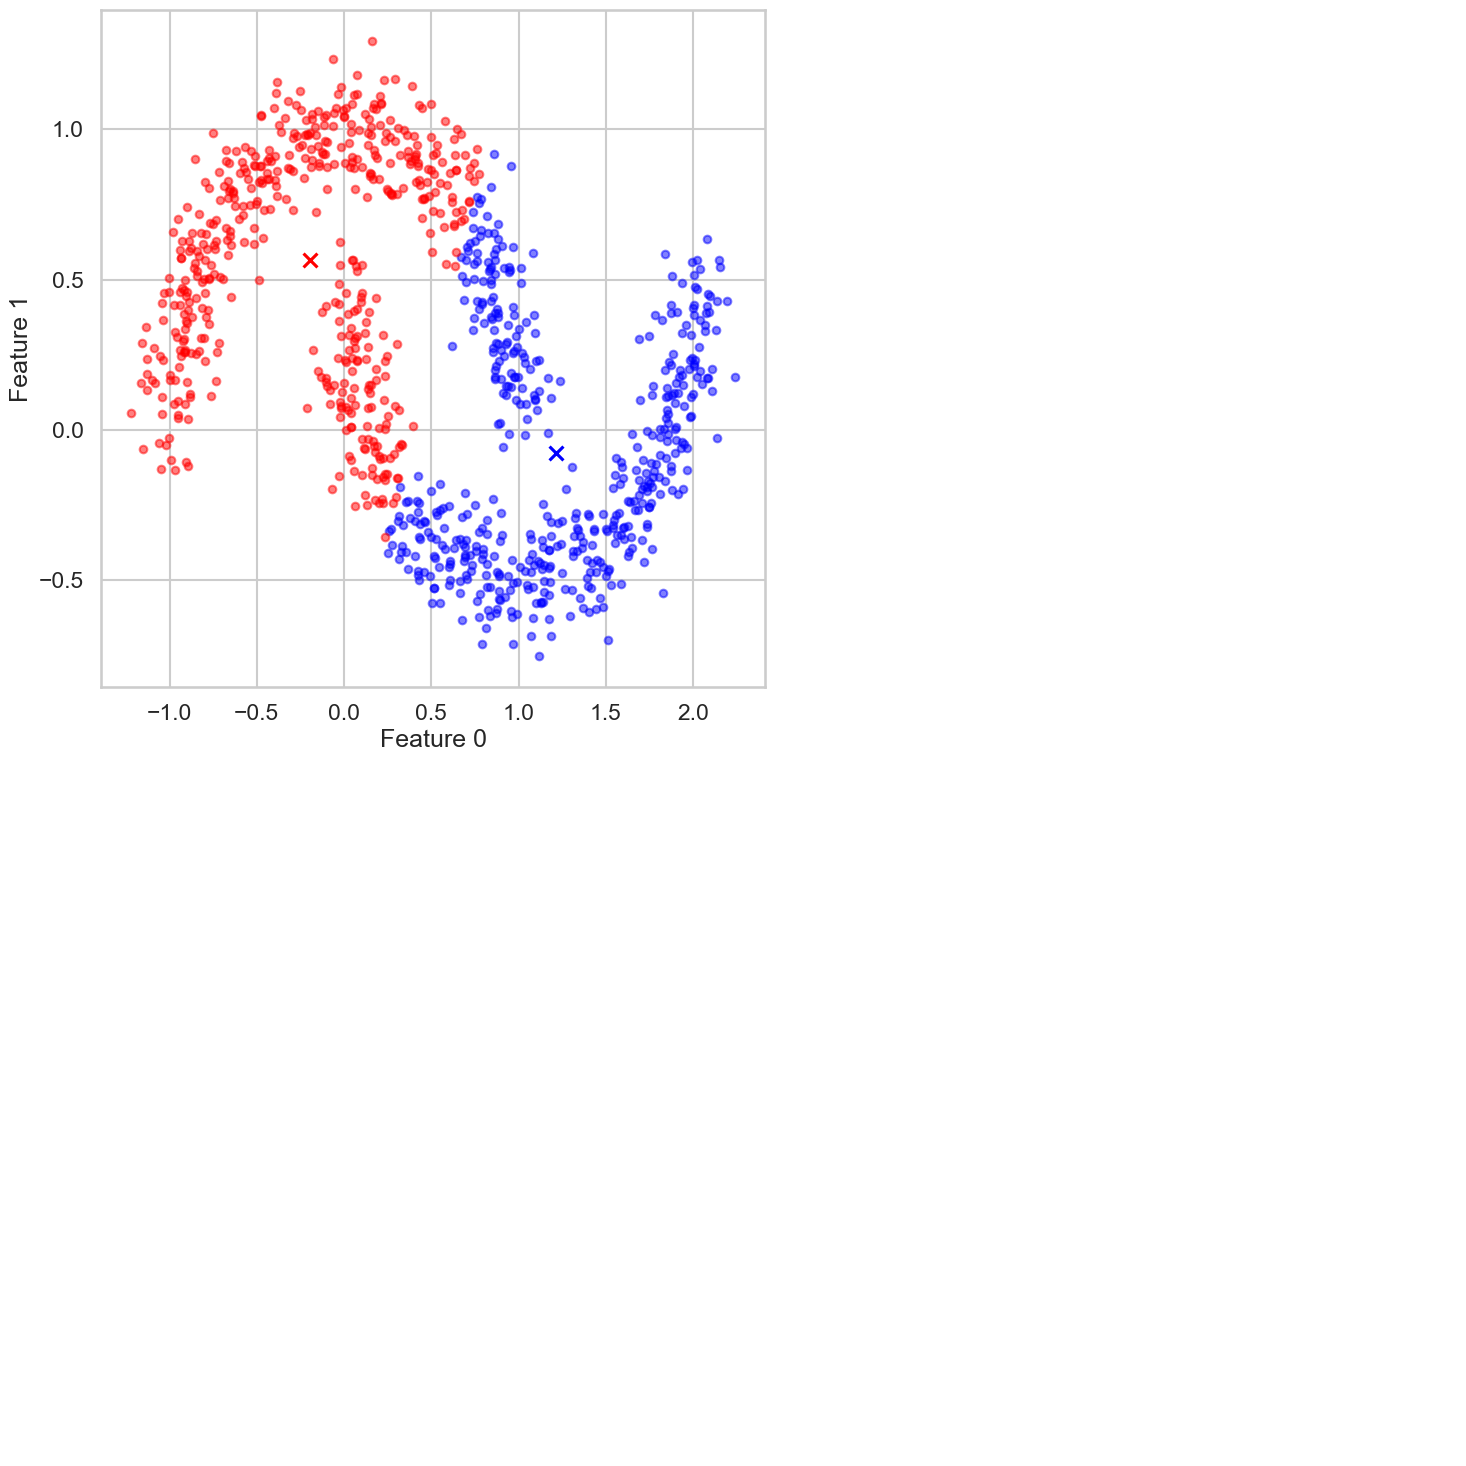

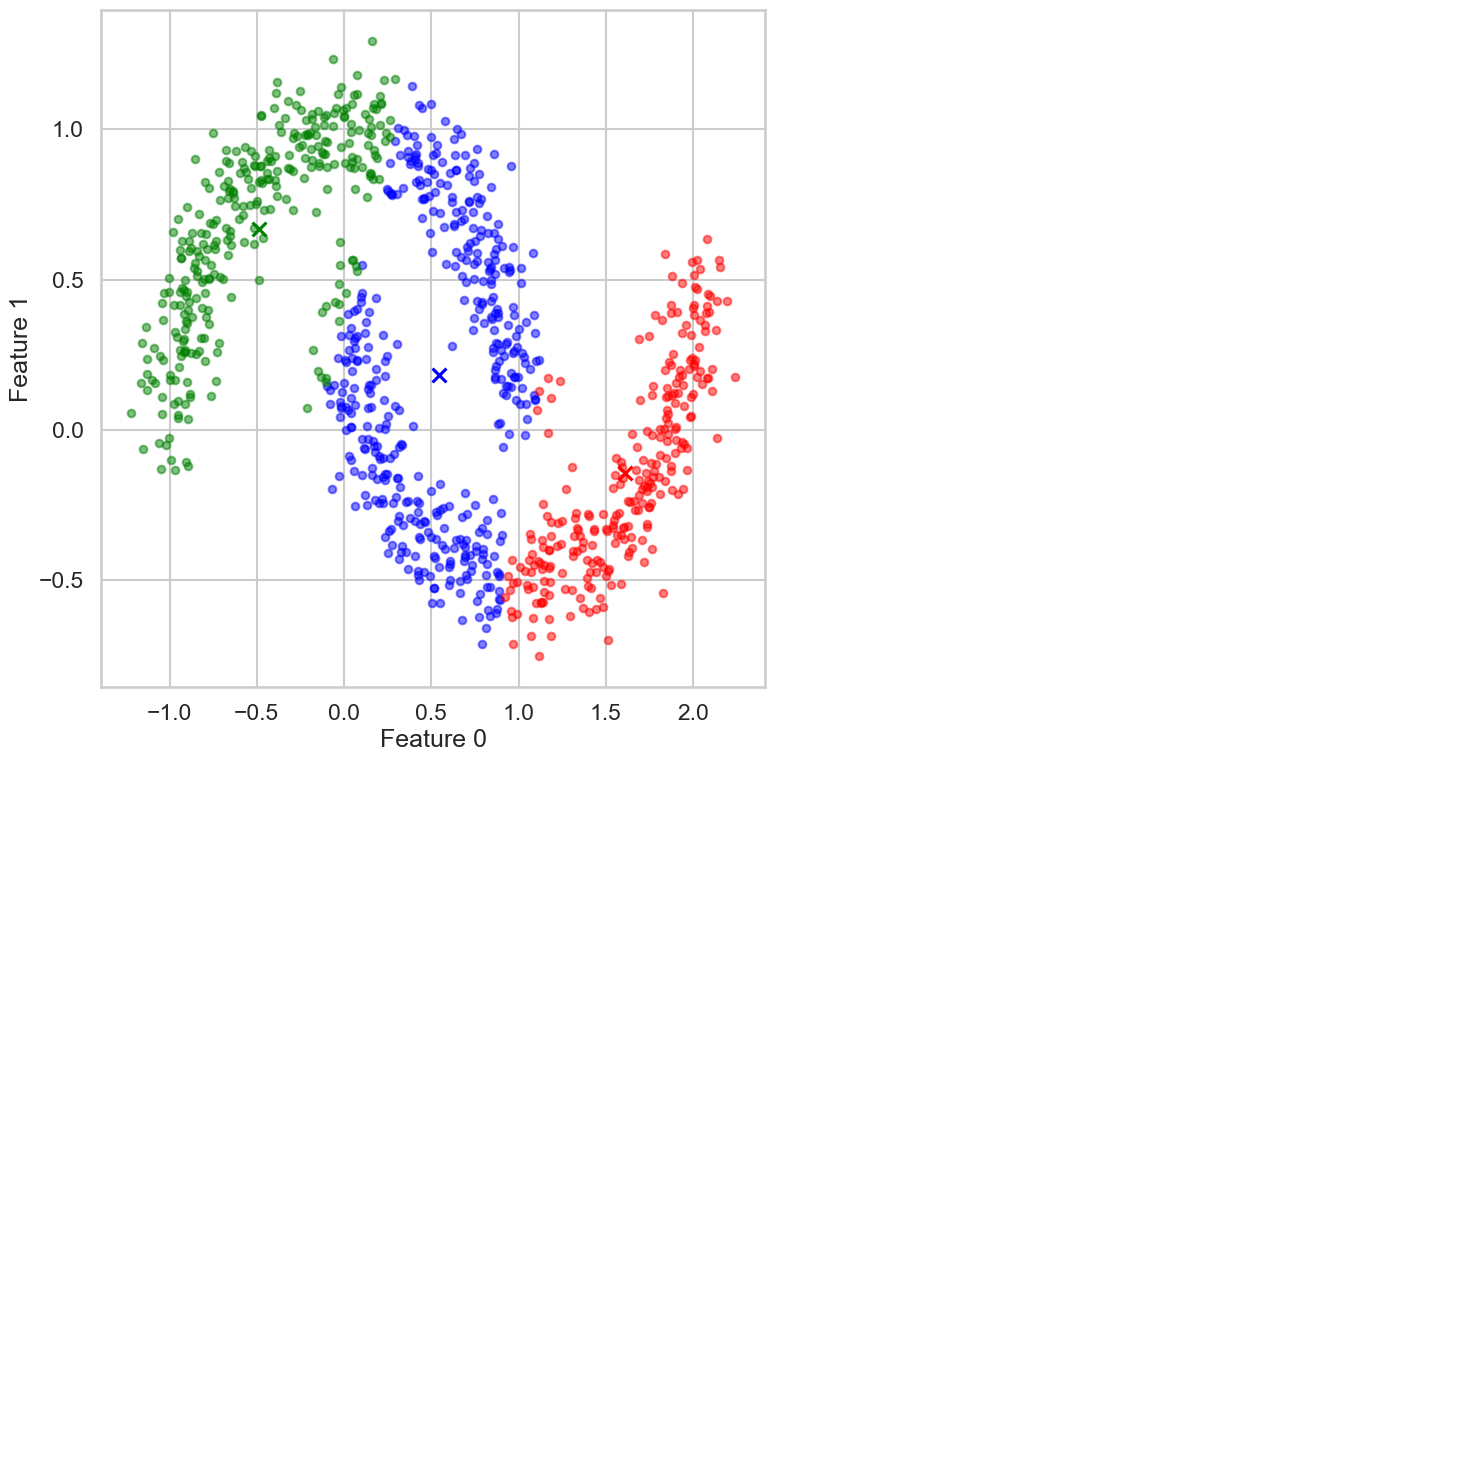

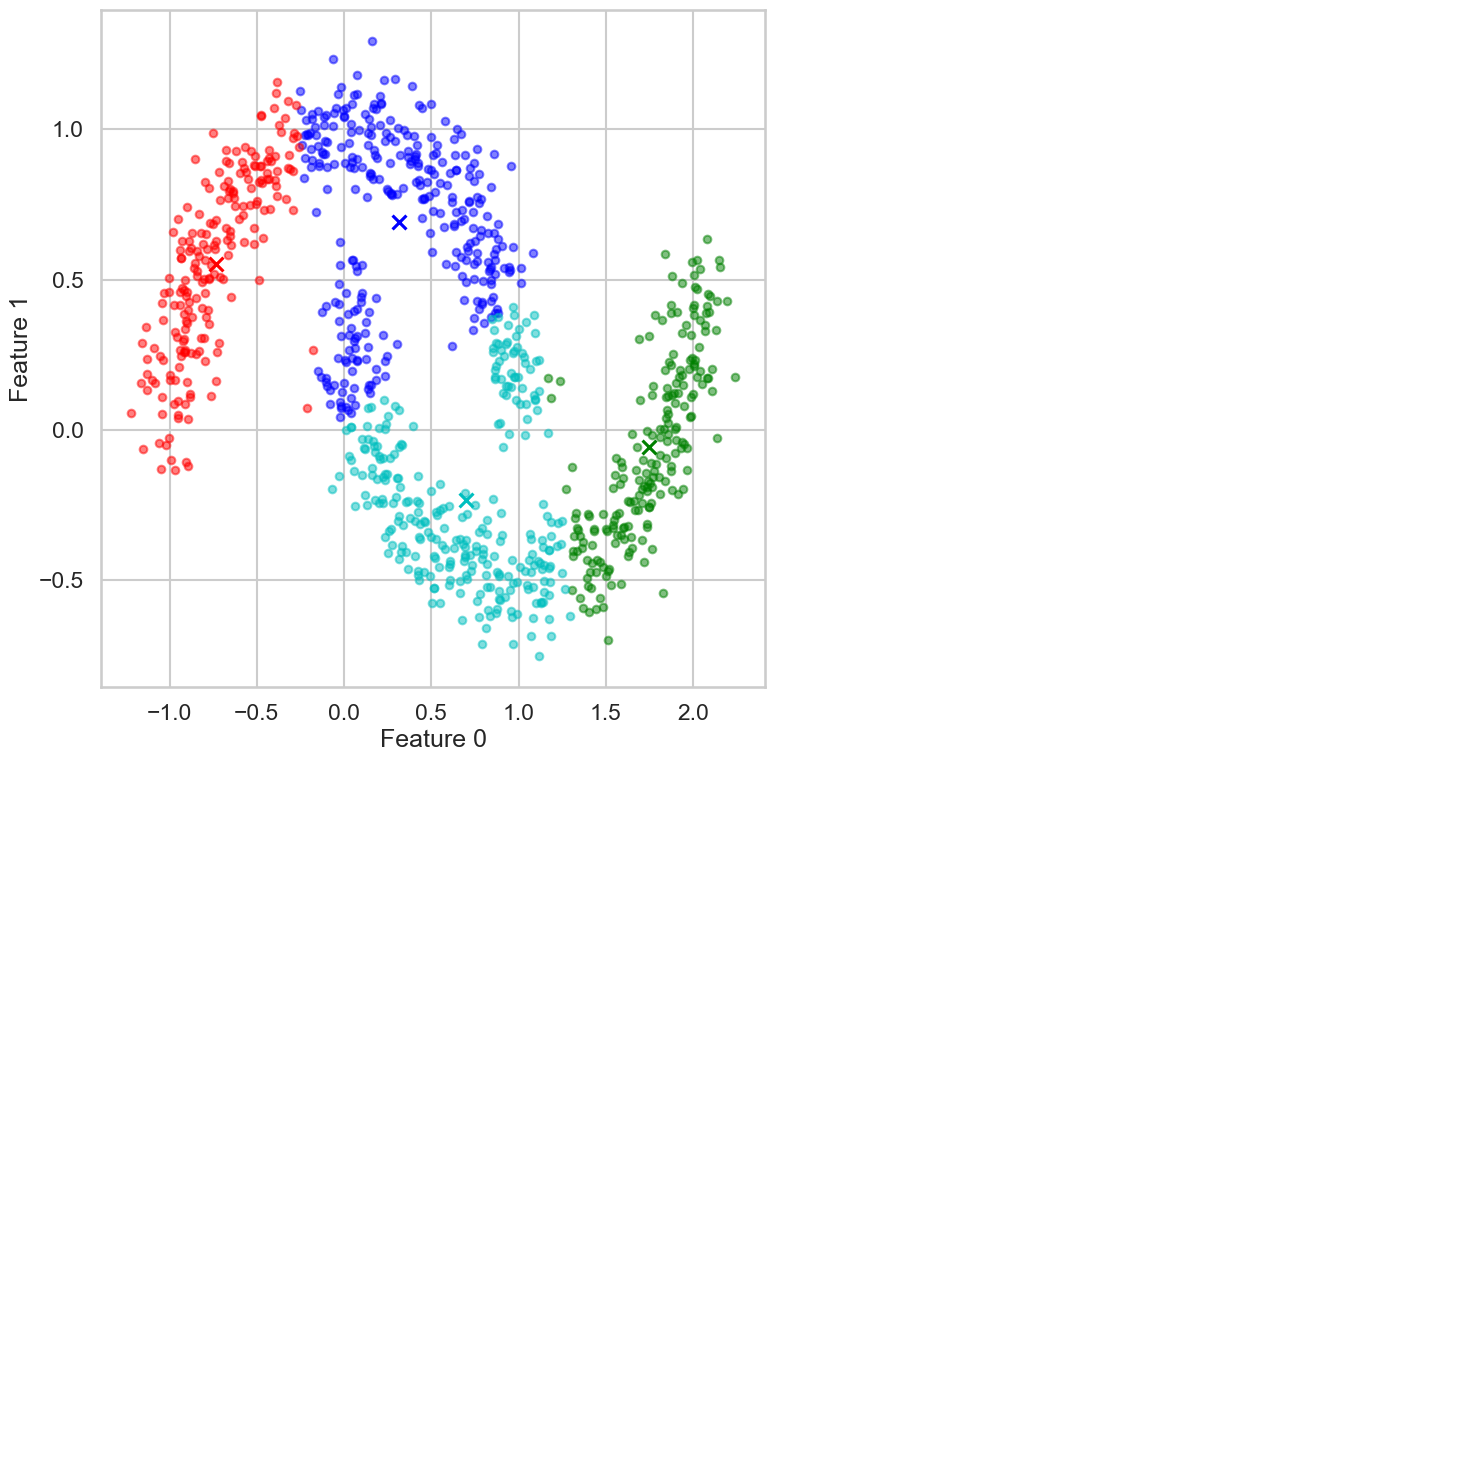

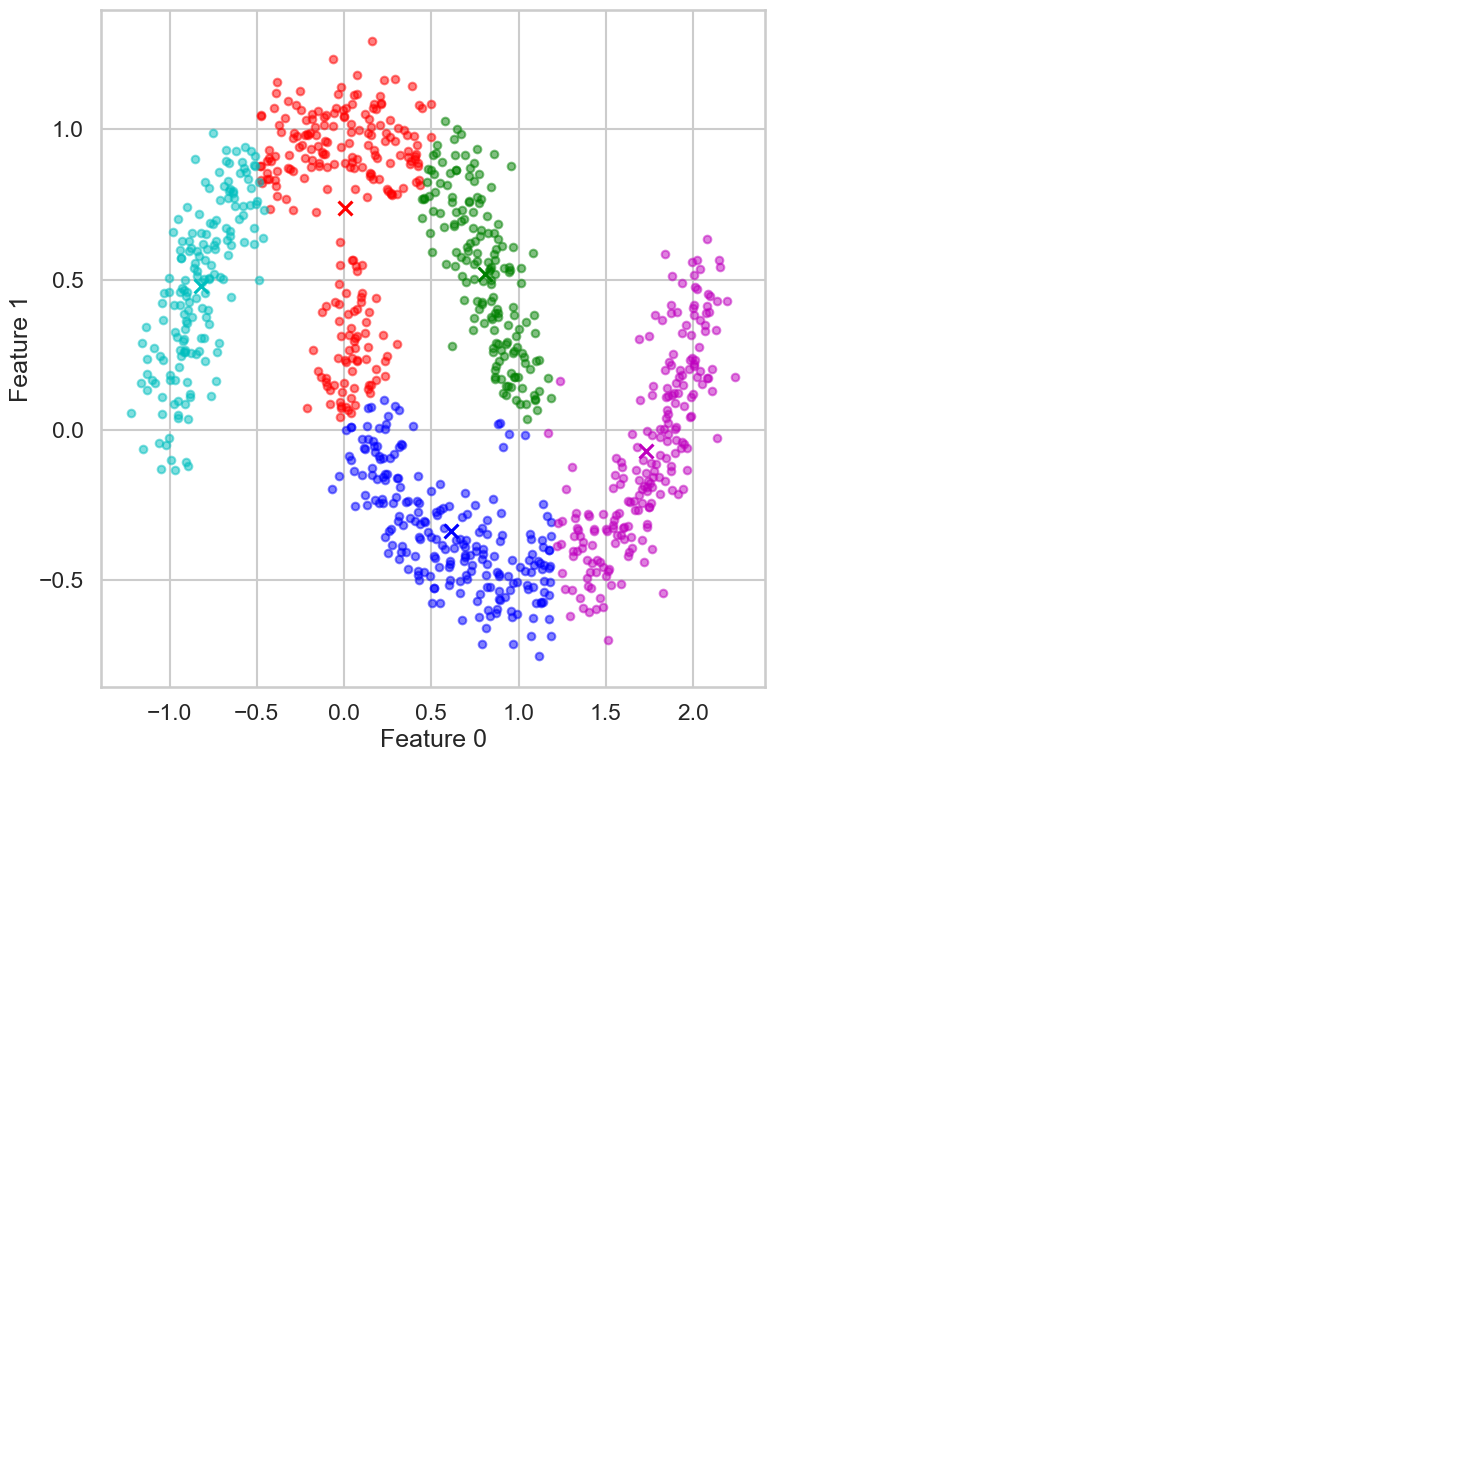

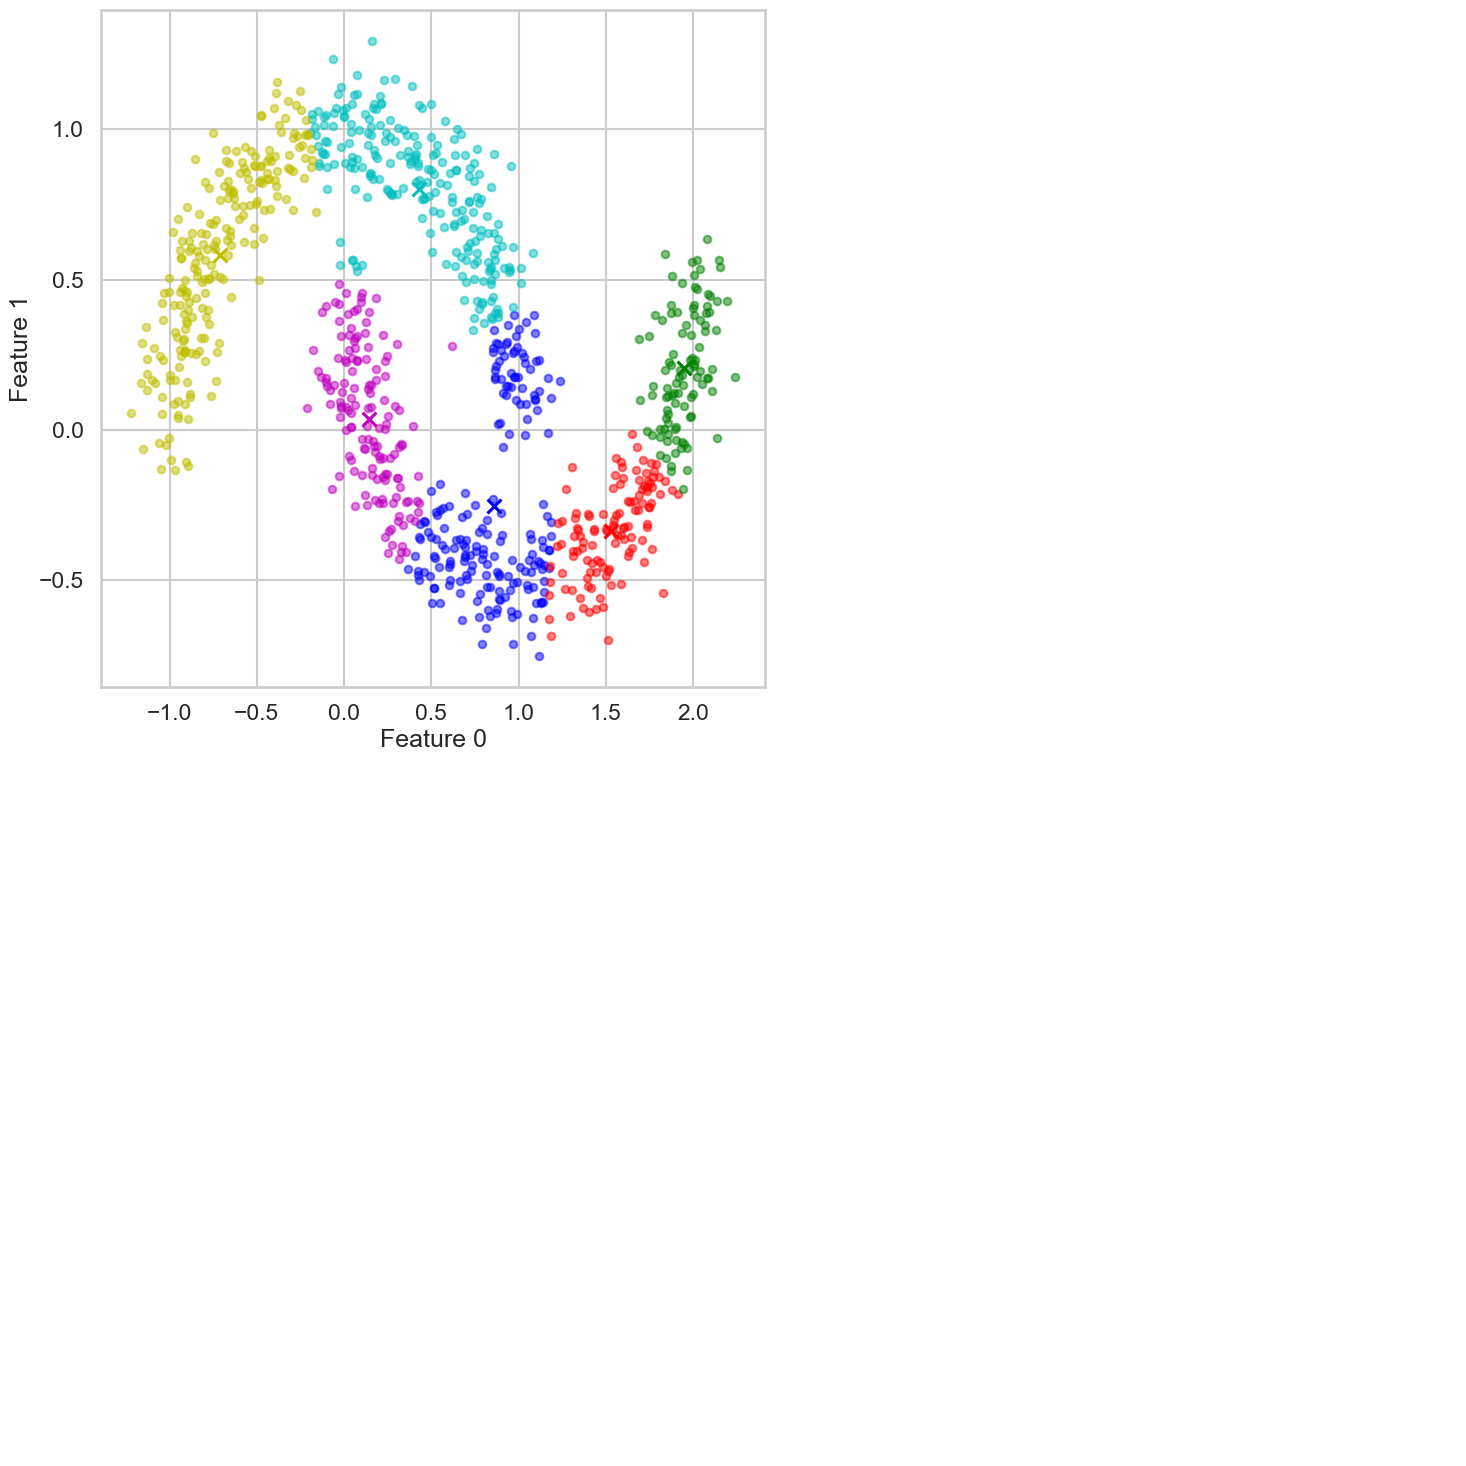

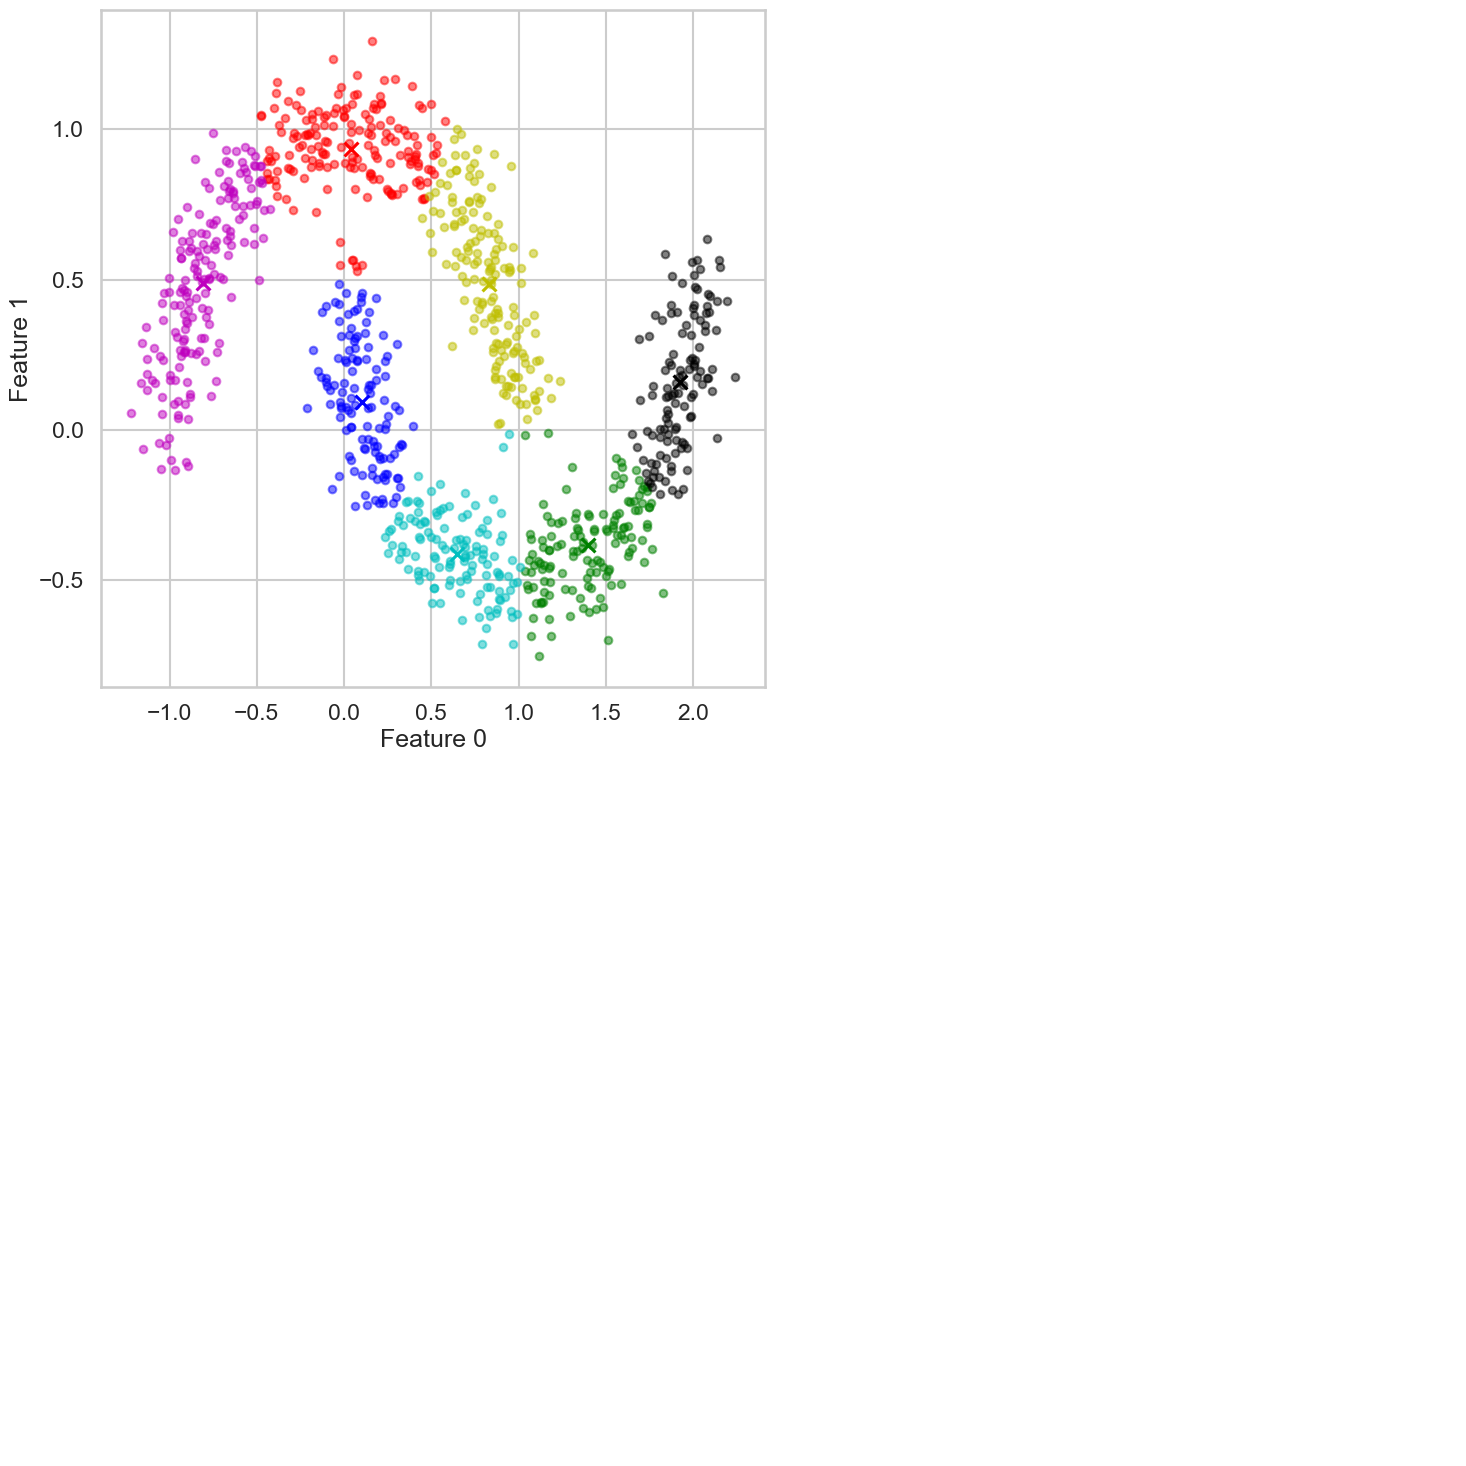

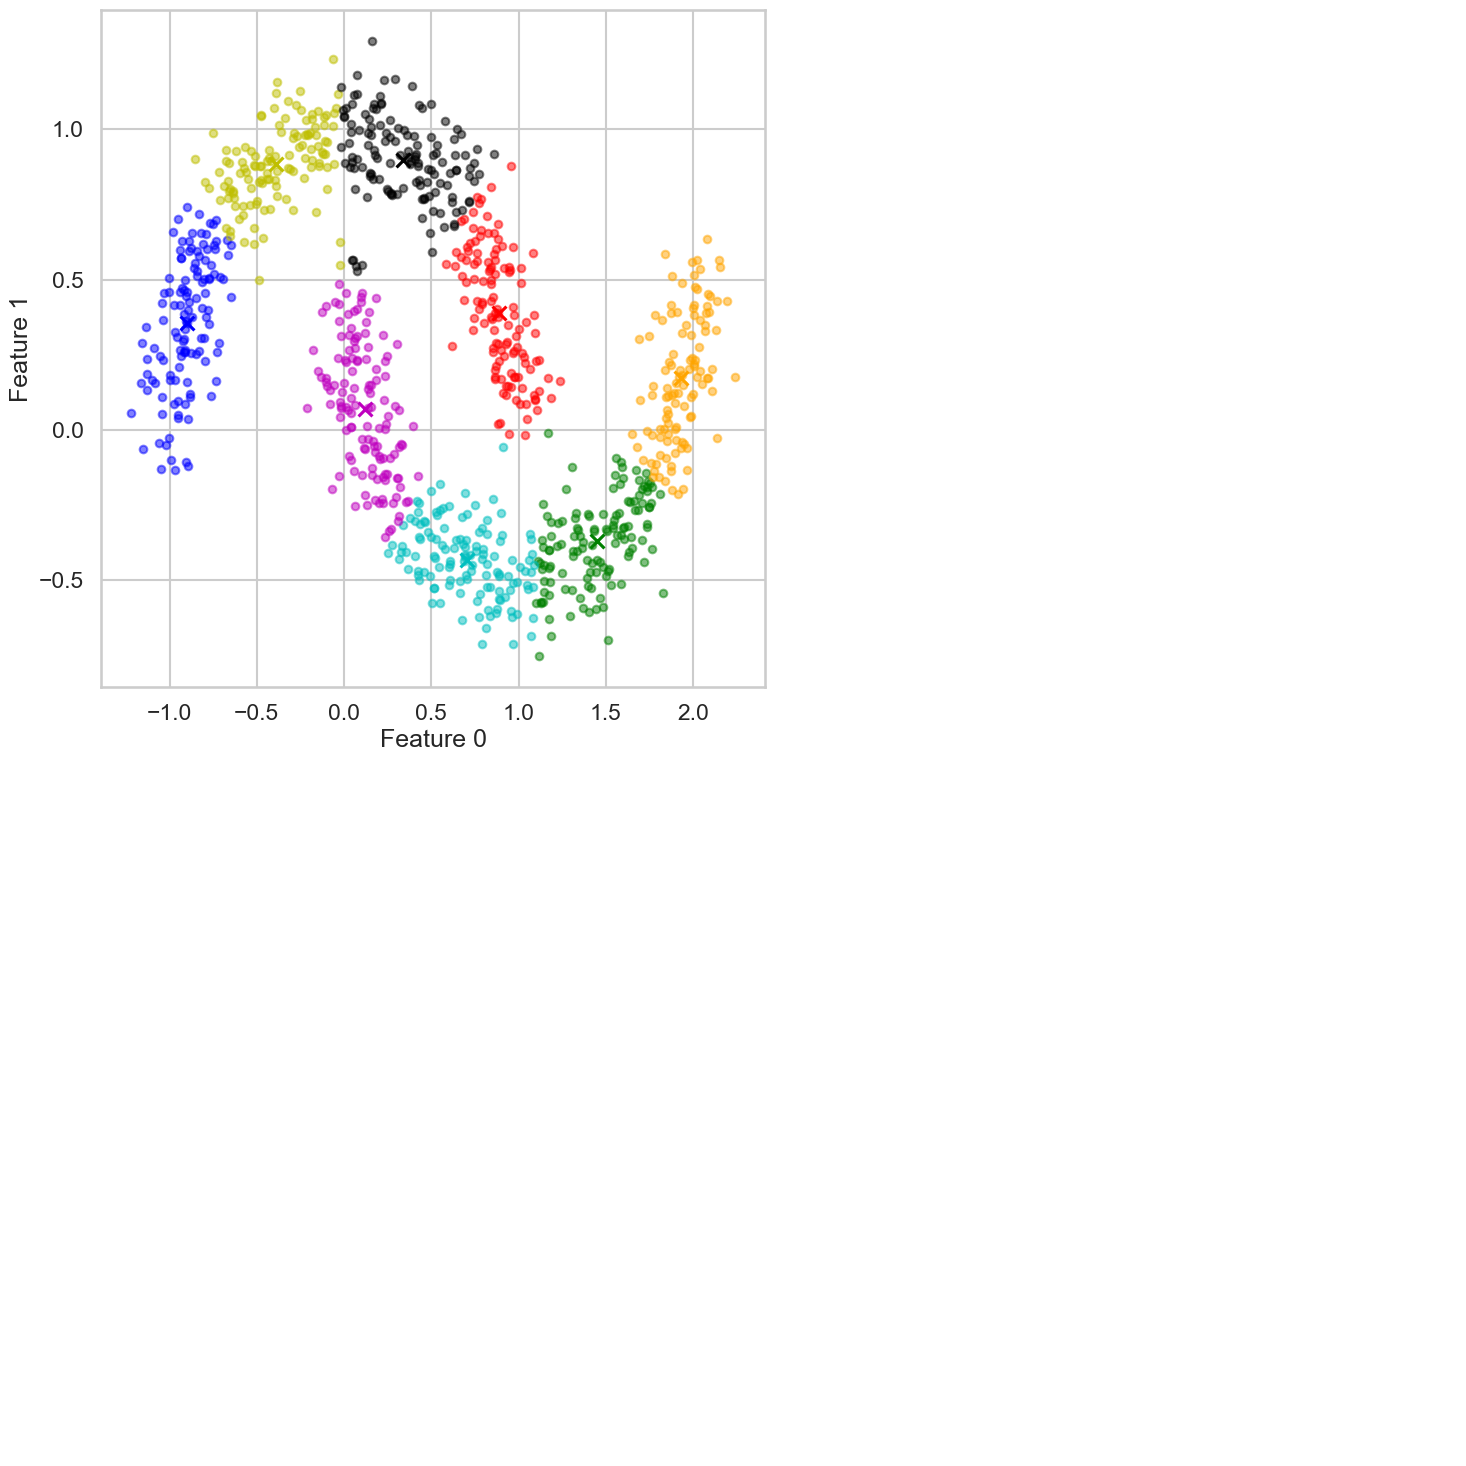

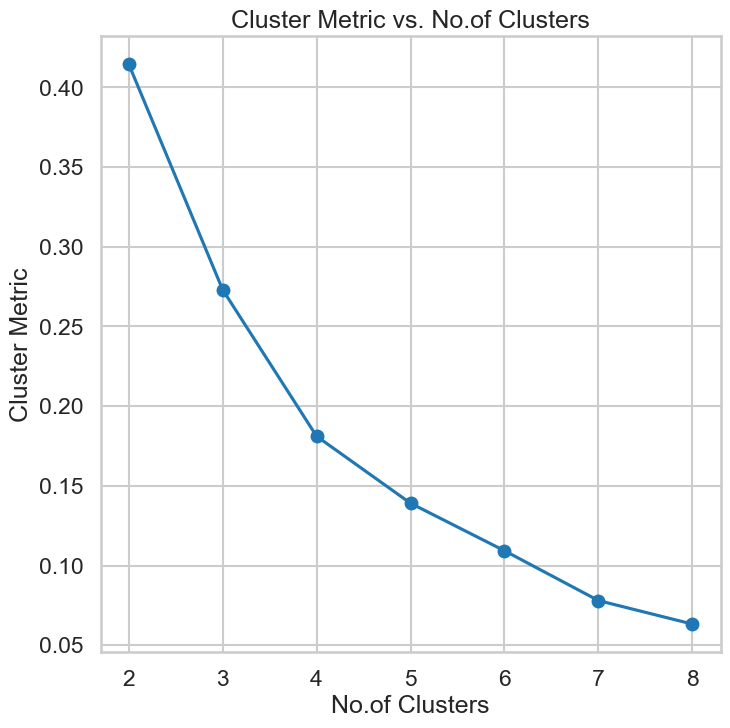

In [125]:
Cluster_Metric_Mean = np.zeros(8)
Ks = np.zeros(8)

for i in range(2,9):
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X,i,"Ecluidian distance",False)
    Cluster_Metric_Mean[i-1] = np.mean(Cluster_Metric)
    Ks[i-1] = i
    display_cluster(X, Final_Cluster_Distance, num_clusters=i)


for i in range(len(Cluster_Metric_Mean)):
    if np.isnan(Cluster_Metric_Mean[i]):
        # Take the mean of the neighboring values (before and after)
        before_value = Cluster_Metric_Mean[i-1] if i-1 >= 0 else np.nan
        after_value = Cluster_Metric_Mean[i+1] if i+1 < len(Cluster_Metric_Mean) else np.nan
        Cluster_Metric_Mean[i] = np.nanmean([before_value, after_value])
        
# Plot the graph
plt.plot(Ks[1:], Cluster_Metric_Mean[1:], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show() 

#### Using Pearson Distance

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

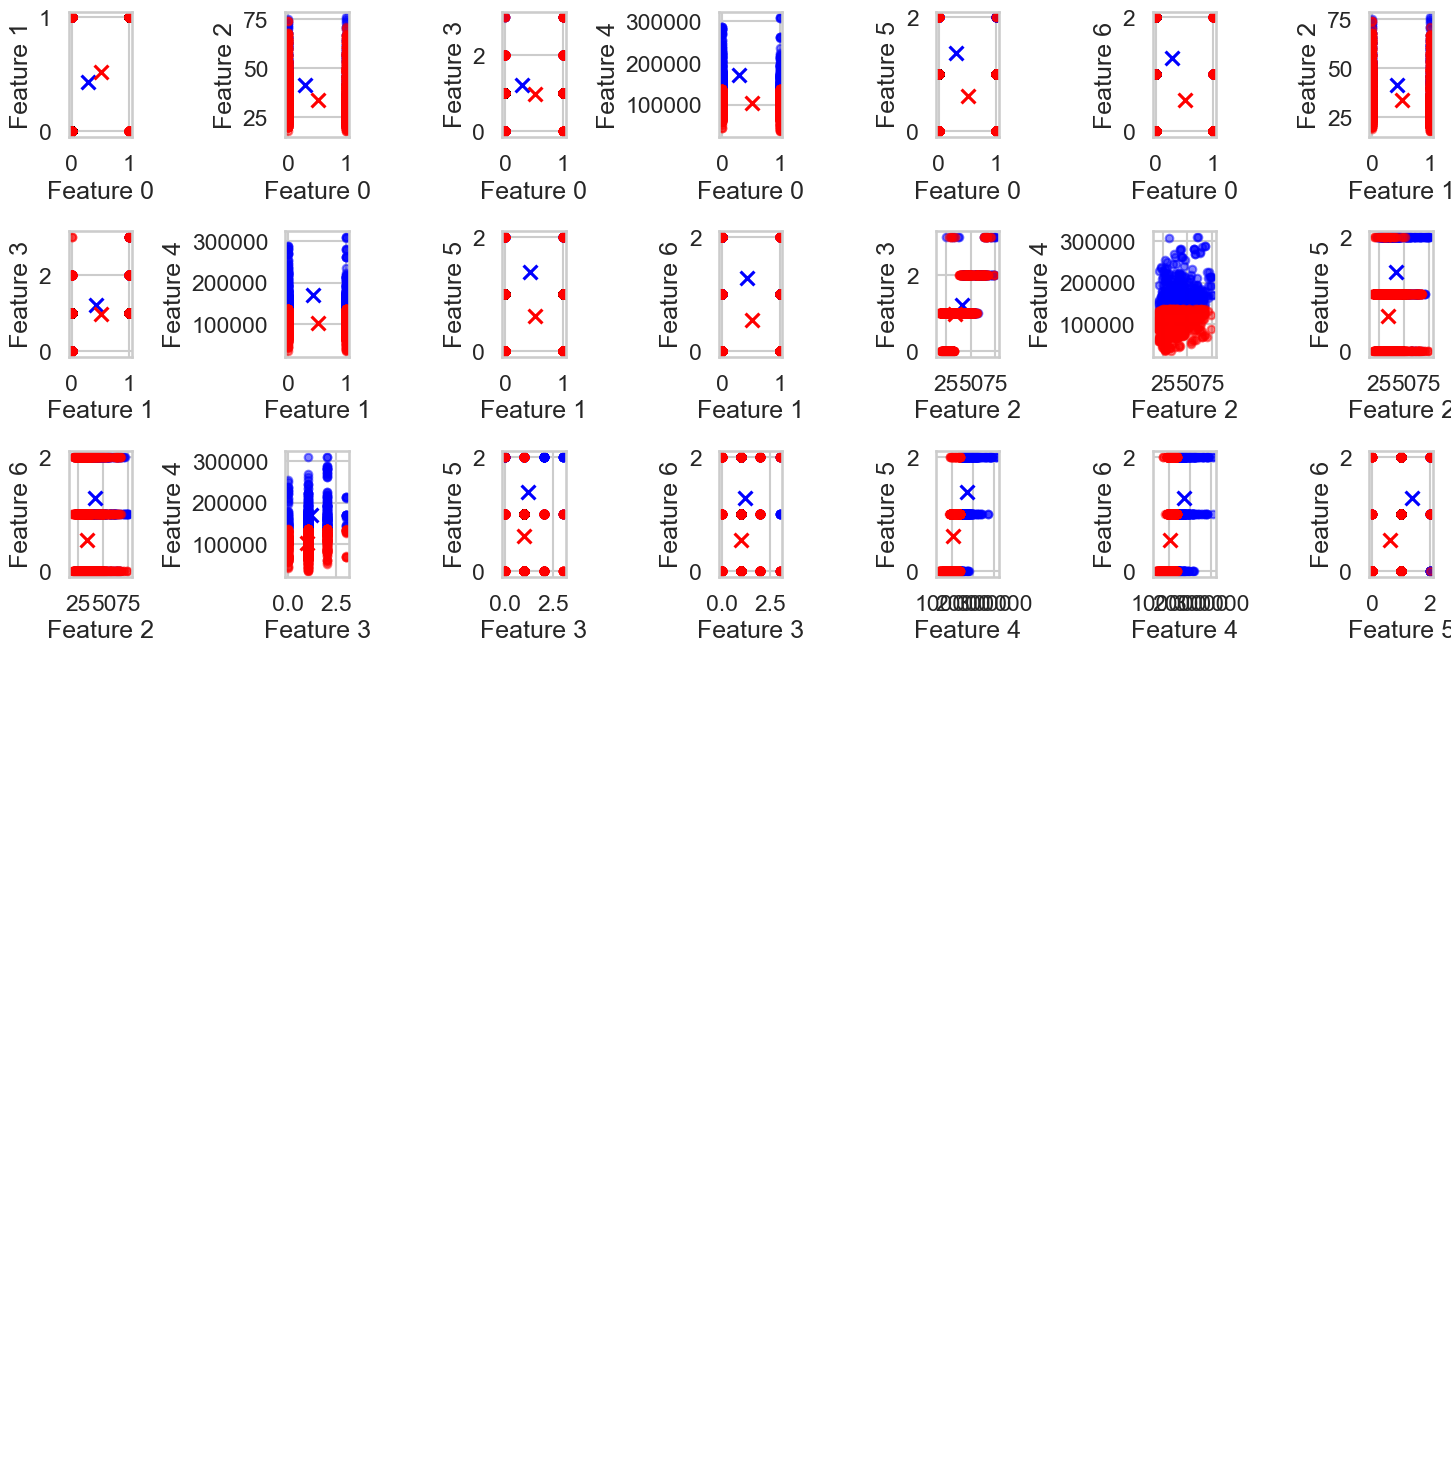

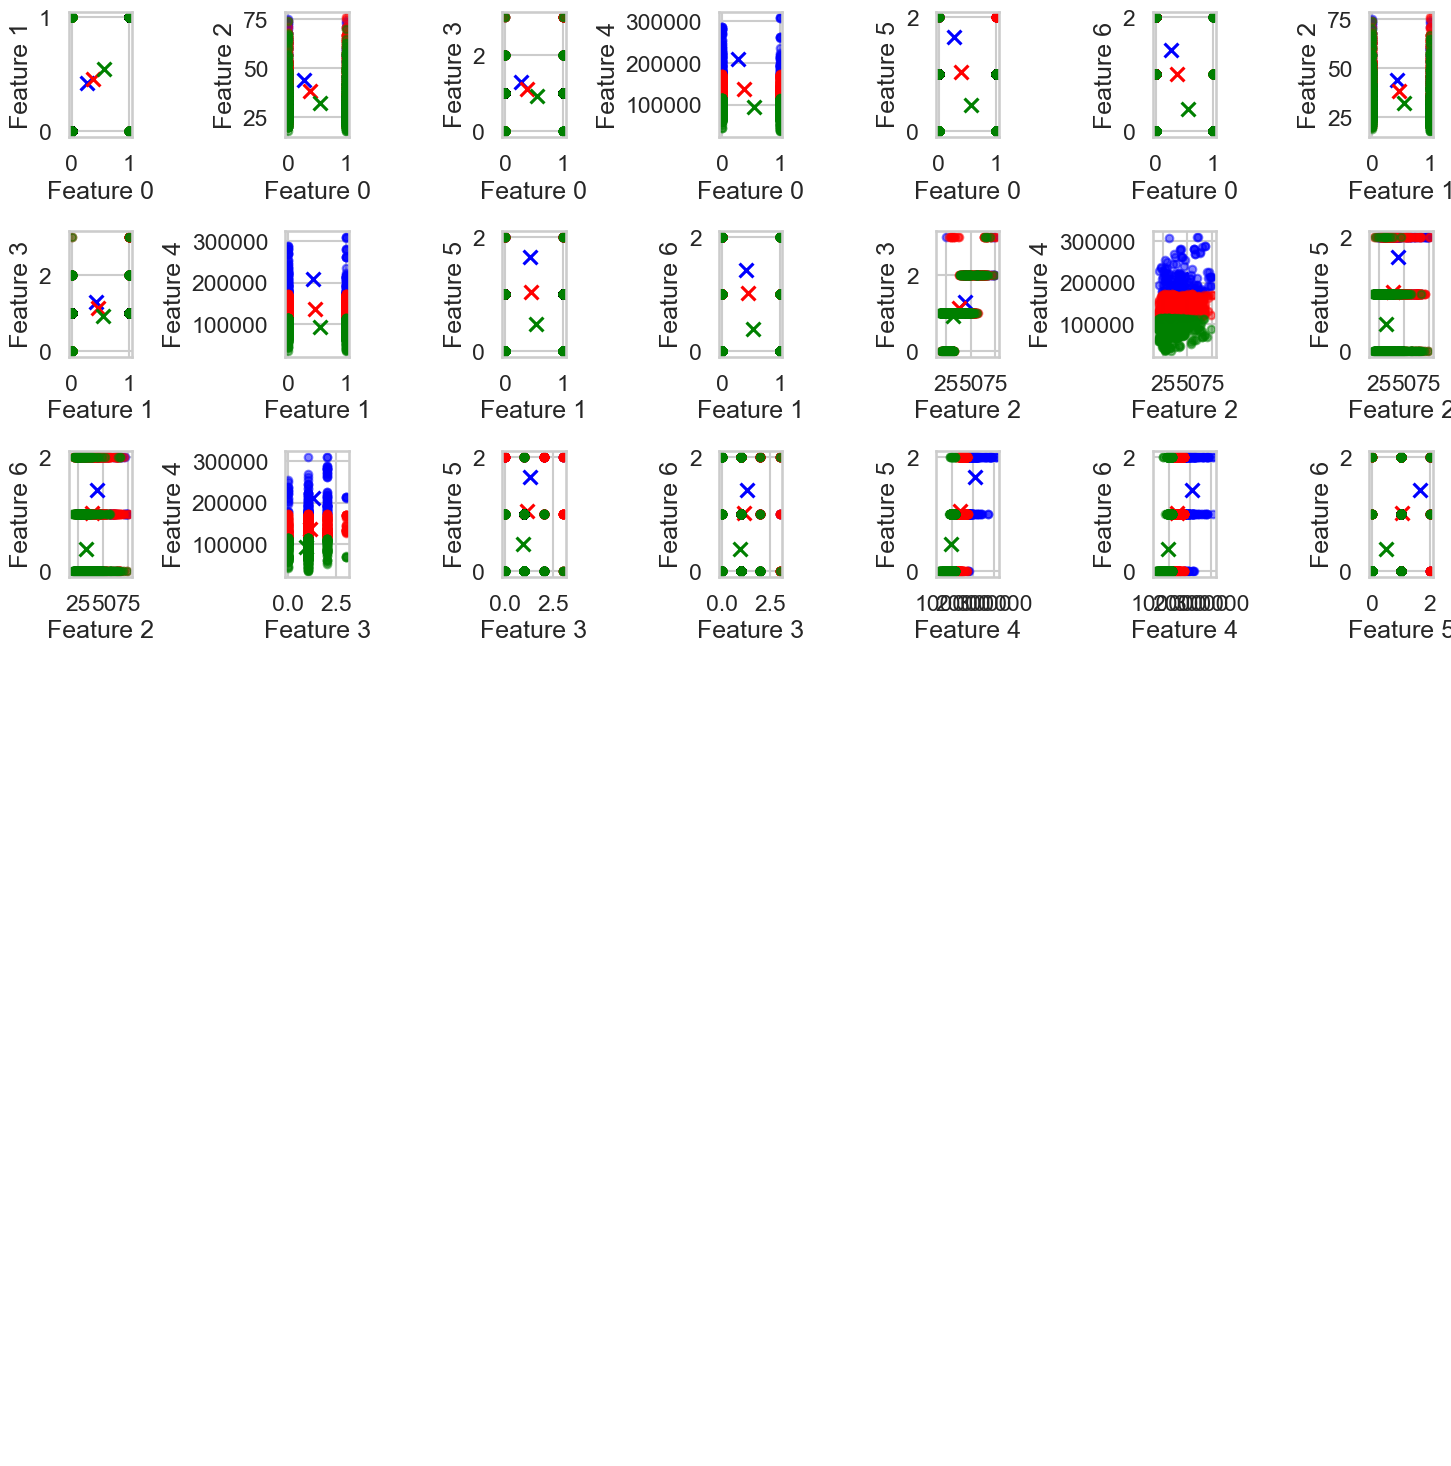

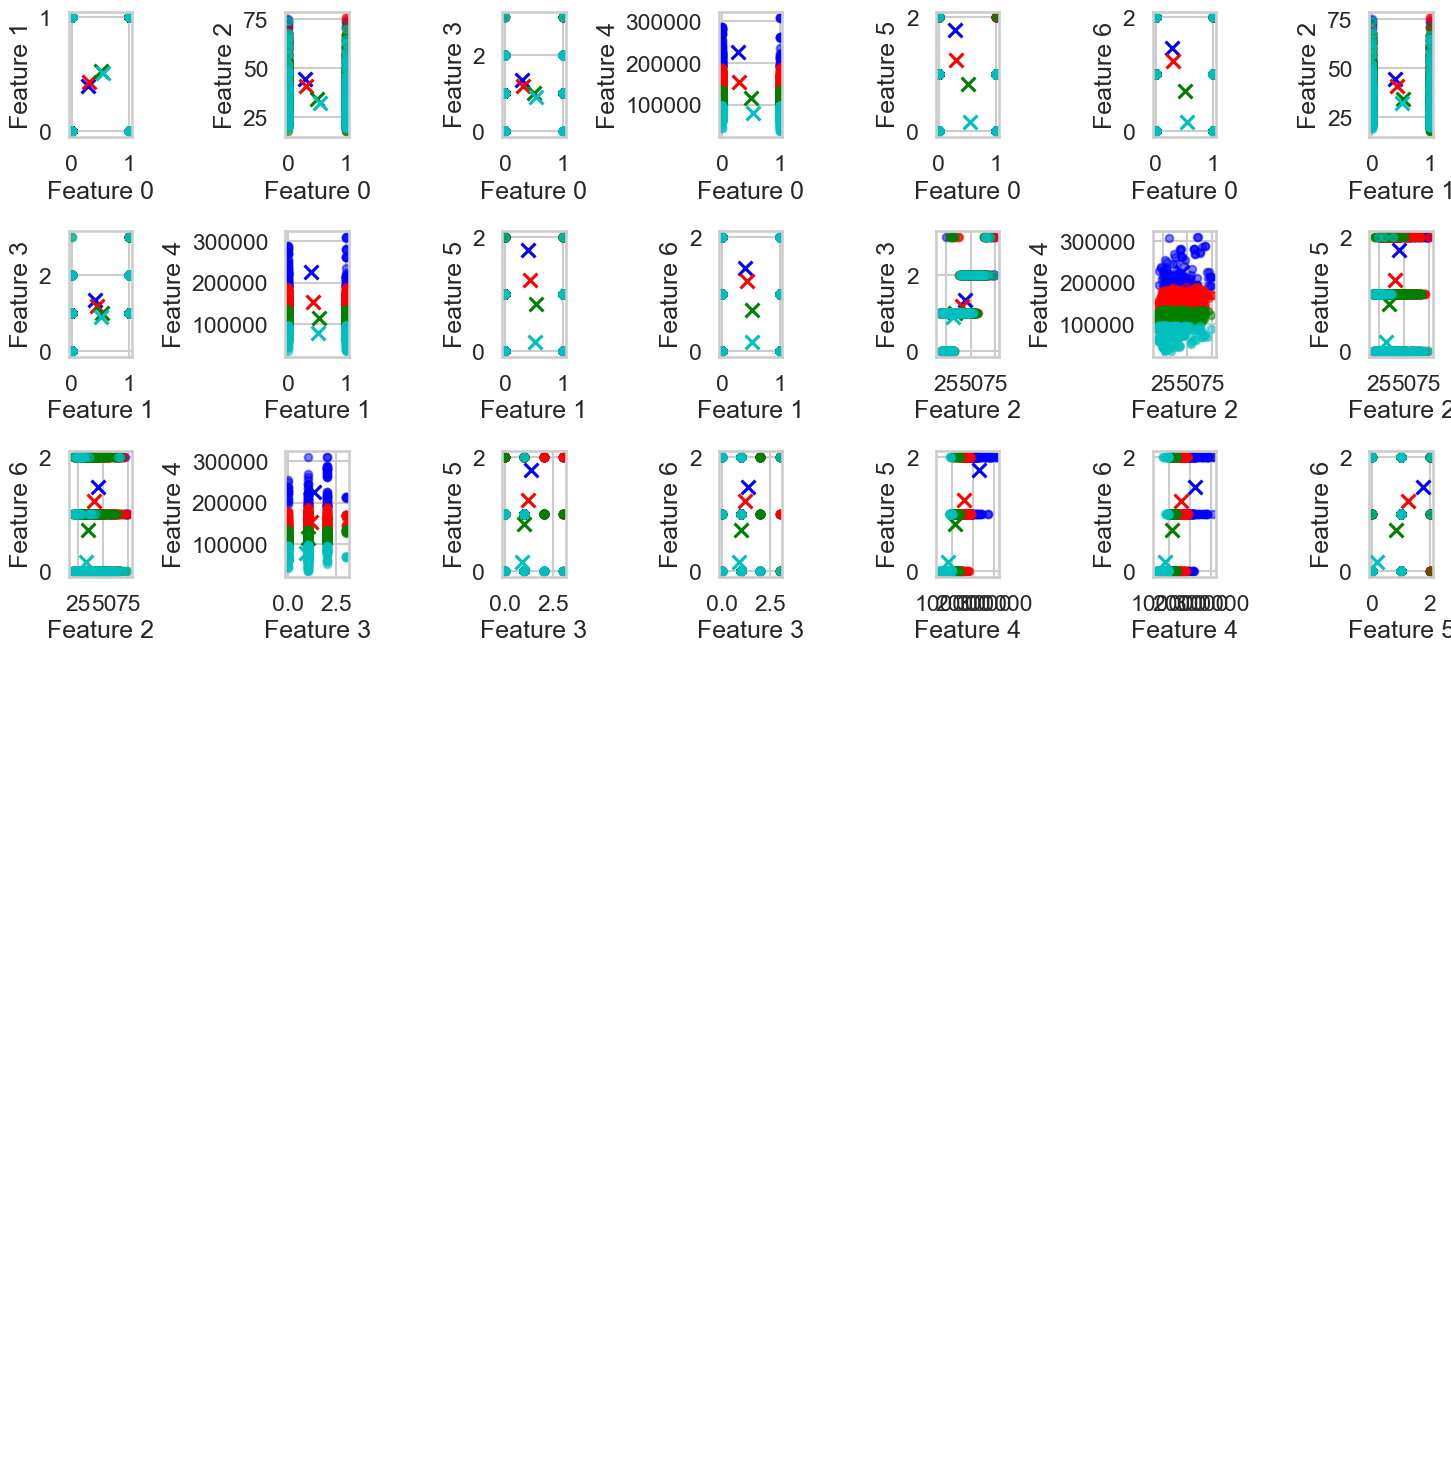

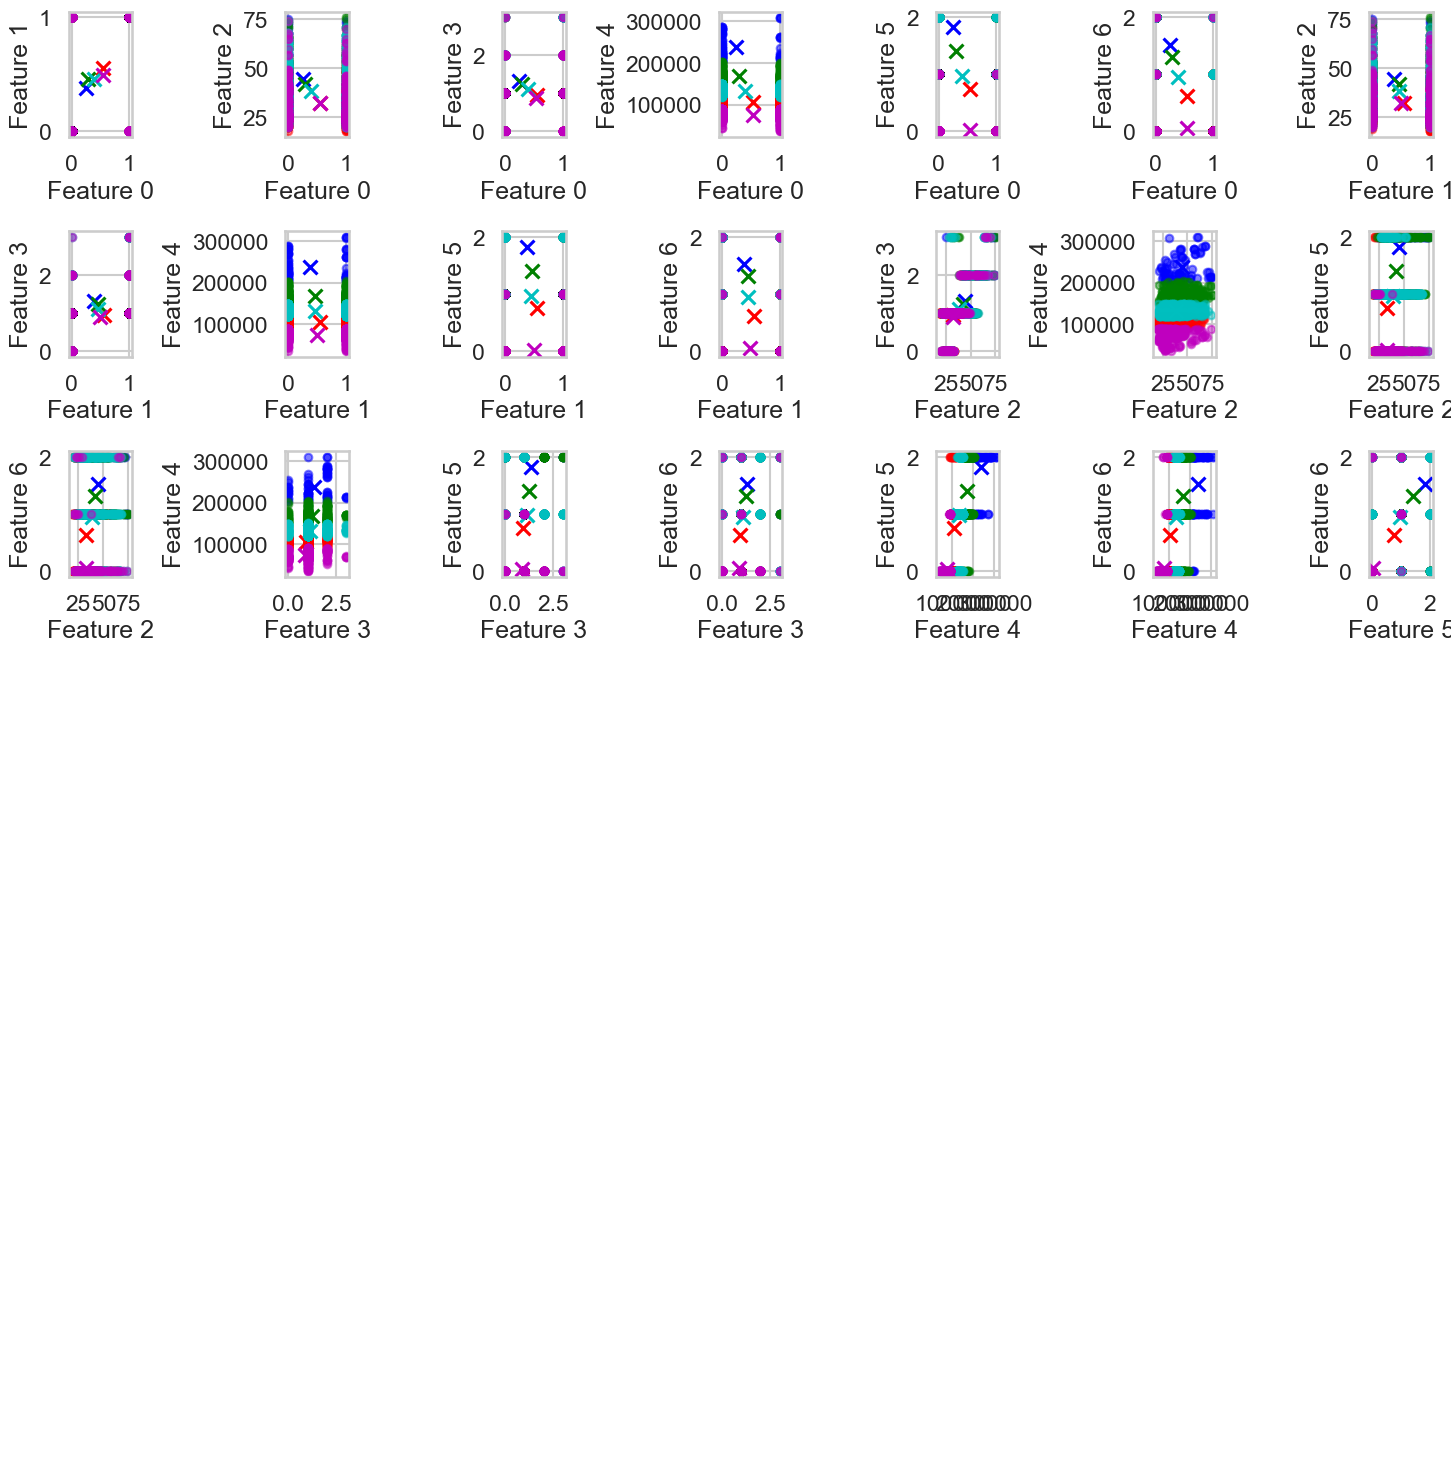

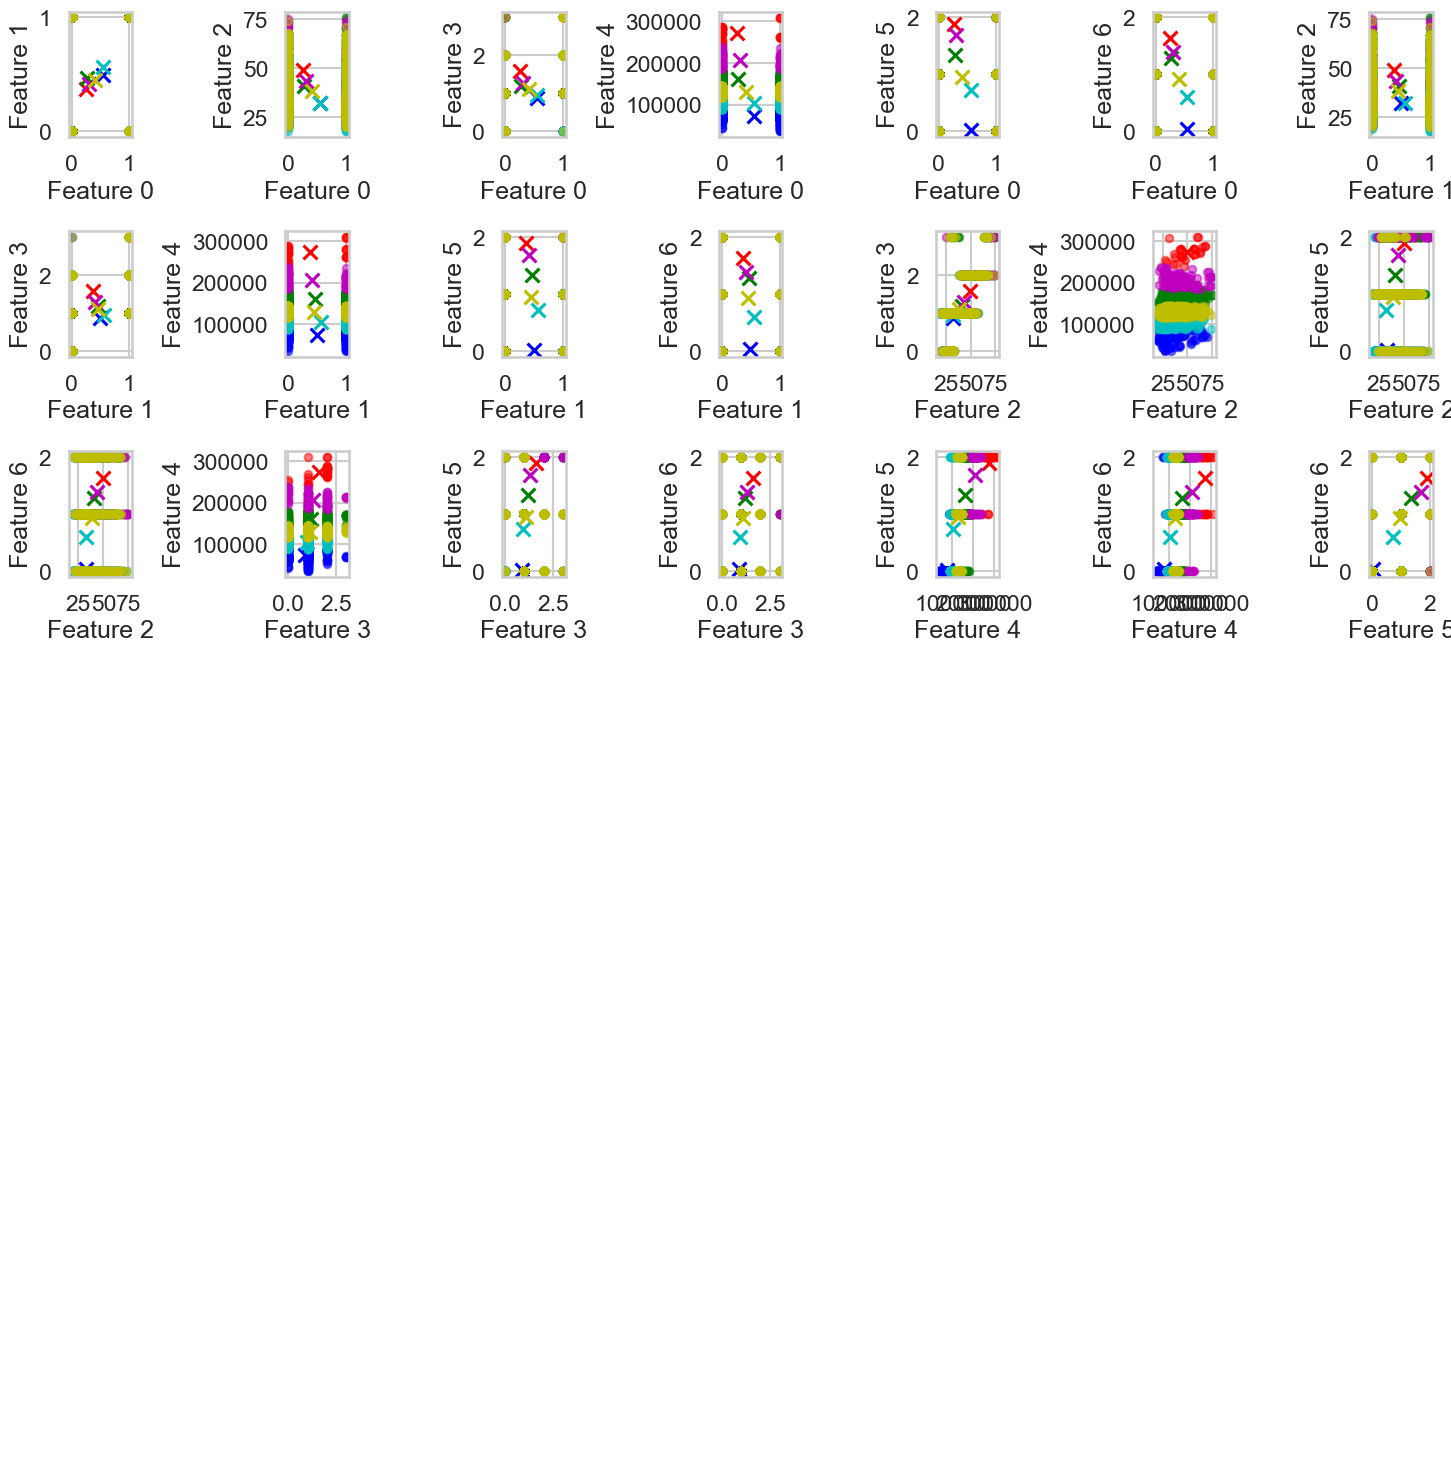

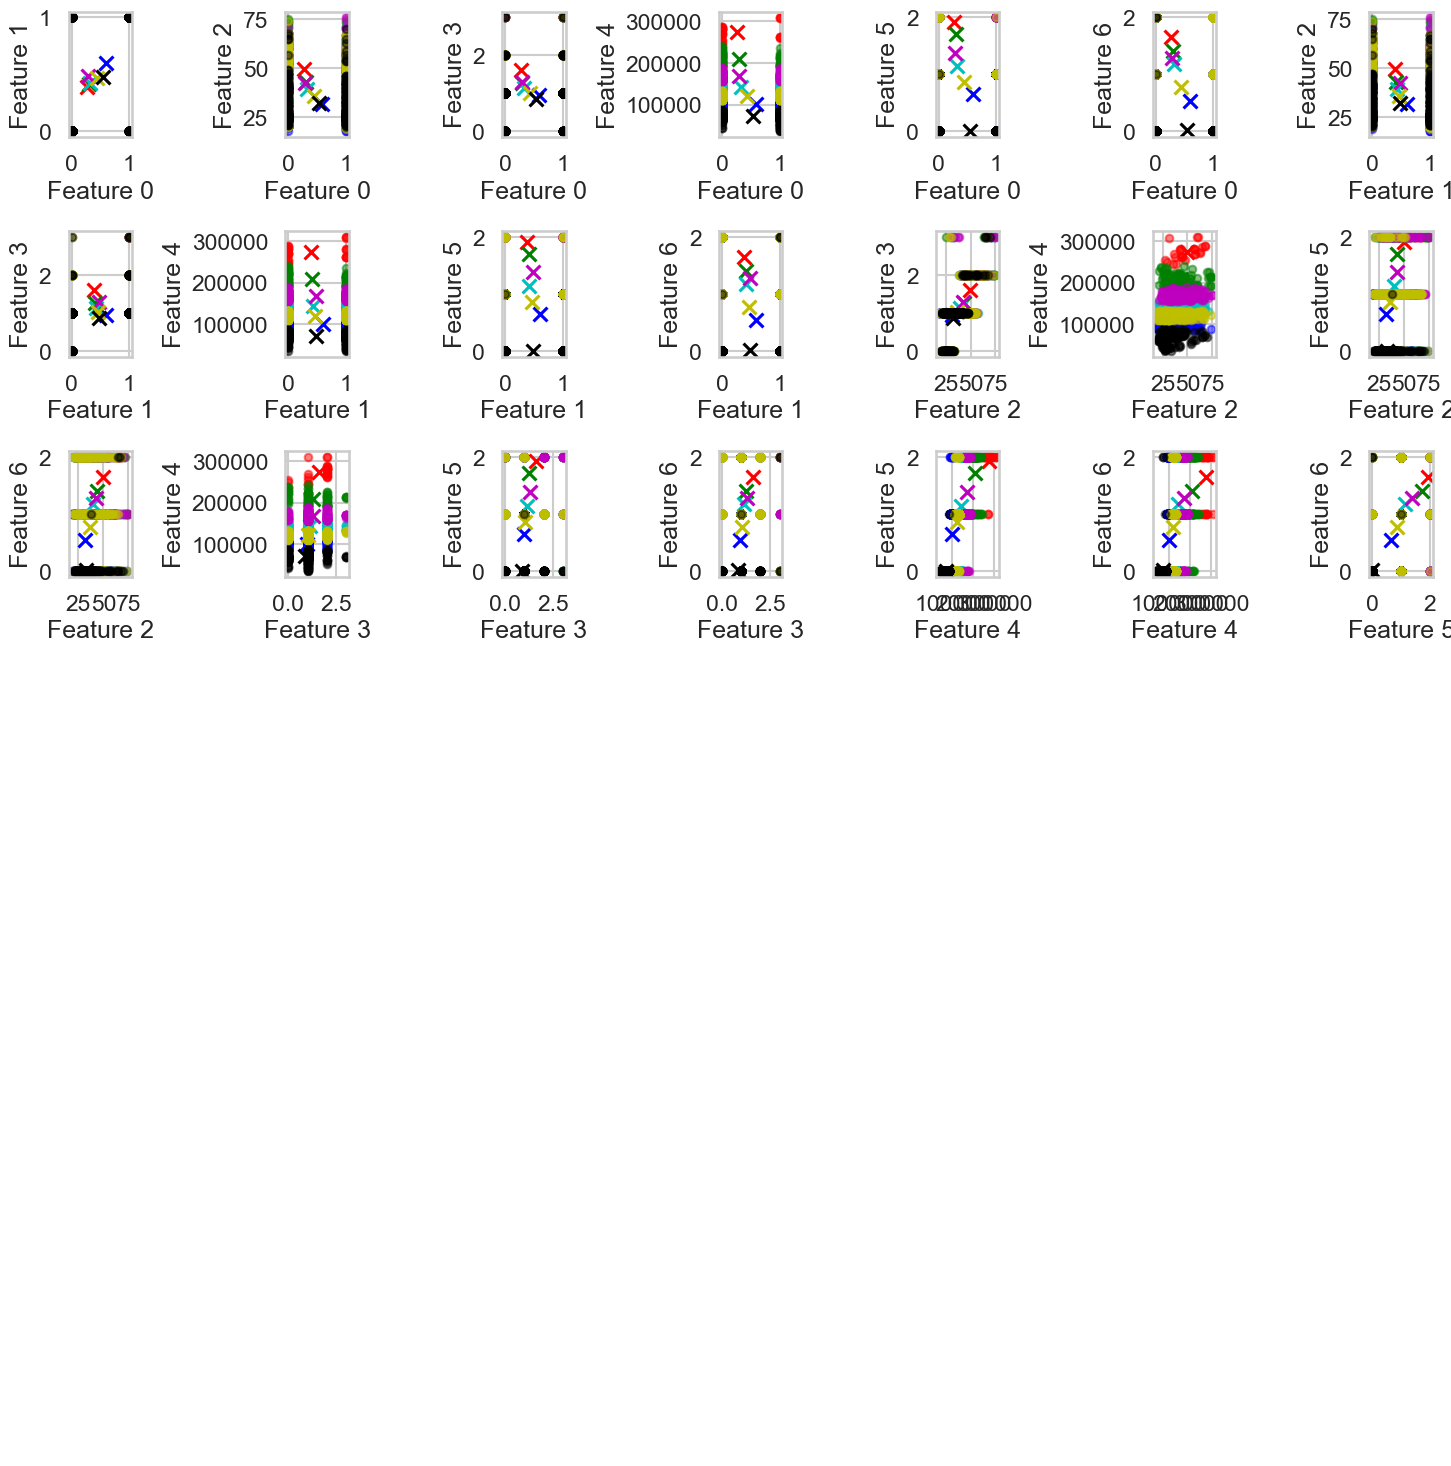

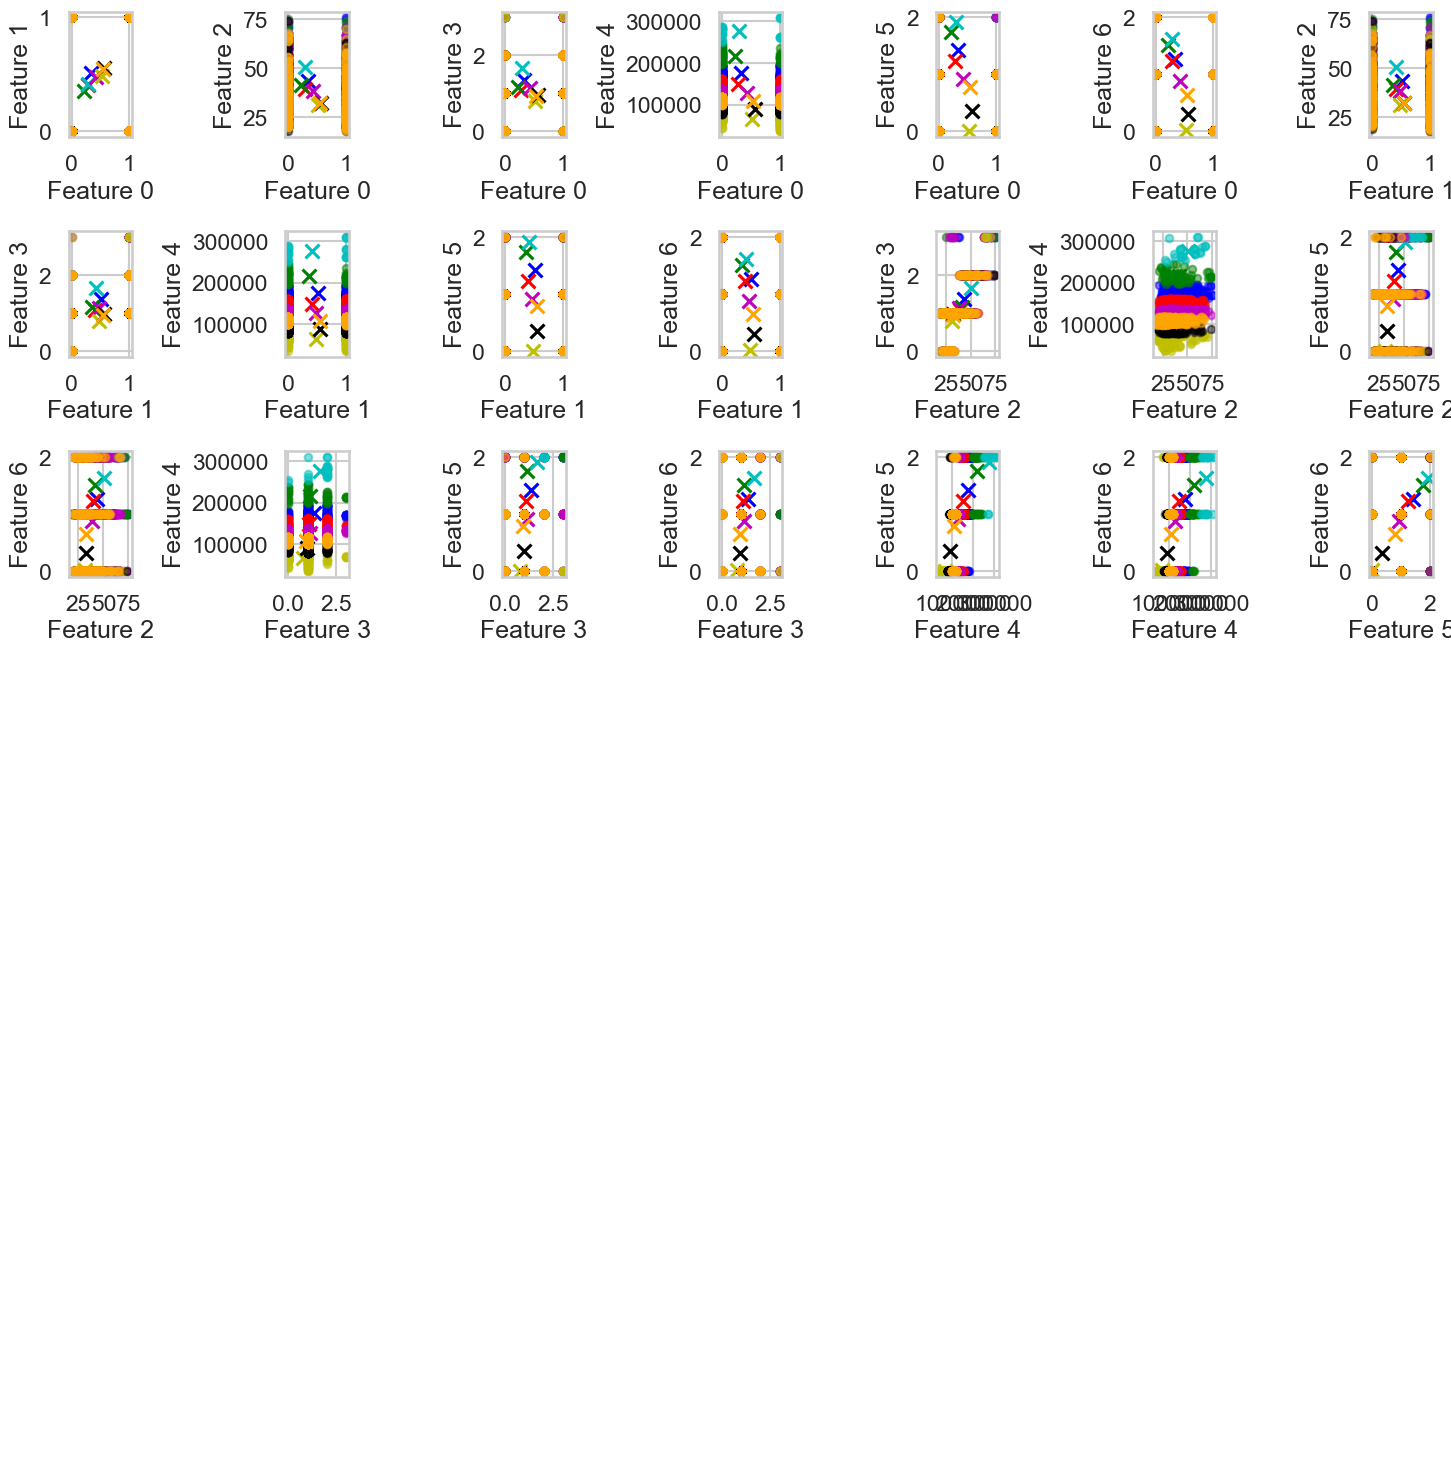

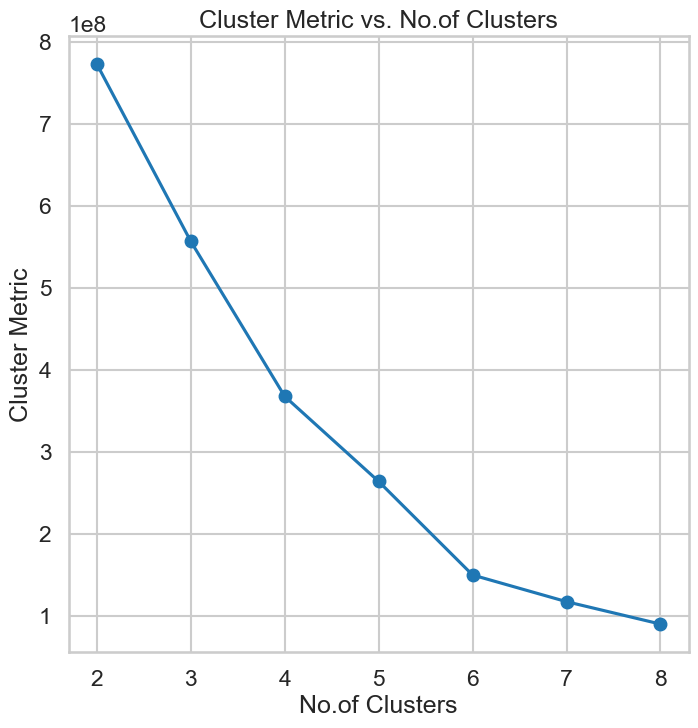

In [130]:
Cluster_Metric_Mean = np.zeros(8)
Ks = np.zeros(8)

X = Customer_data

for i in range(2,9):
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X,i,"Ecluidian distance",False)
    Cluster_Metric_Mean[i-1] = np.mean(Cluster_Metric)
    Ks[i-1] = i
    display_cluster(X, Final_Cluster_Distance, num_clusters=i)


for i in range(len(Cluster_Metric_Mean)):
    if np.isnan(Cluster_Metric_Mean[i]):
        # Take the mean of the neighboring values (before and after)
        before_value = Cluster_Metric_Mean[i-1] if i-1 >= 0 else np.nan
        after_value = Cluster_Metric_Mean[i+1] if i+1 < len(Cluster_Metric_Mean) else np.nan
        Cluster_Metric_Mean[i] = np.nanmean([before_value, after_value])
        
# Plot the graph
plt.plot(Ks[1:], Cluster_Metric_Mean[1:], marker='o', linestyle='-')


# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()

# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 